# Mumbai house prices

## Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import warnings

matplotlib.rcParams['figure.figsize']=(20,10)
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Mumbai1.csv')
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

## Understanding the data

In [5]:
print('Number of rows in the dataset : ' ,df.shape[0])
print('Number of rows in the dataset : ' ,df.shape[1])

Number of rows in the dataset :  6347
Number of rows in the dataset :  19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [7]:
df.describe()

,Id,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['Price per Area']=df['Price']/df['Area']

In [9]:
#Price in lakhs
df['Price']=df['Price']/100000

In [10]:
len(df['Location'].unique())

413

In [11]:
df['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [12]:
print("No.of.unique values in Location :", len(pd.unique(df['Location'])))

No.of.unique values in Location : 413


## Mapping the regions to their respective pincodes

In [13]:
location_pincode = {
    'Kharghar': '410210',
    'Sector-13 Kharghar': '410210',
    'Sector 18 Kharghar': '410210',
    'Sector 20 Kharghar': '410210',
    'Sector 15 Kharghar': '410210',
    'Dombivali': '421201',
    'Churchgate': '400020',
    'Prabhadevi': '400025',
    'Jogeshwari West': '400102',
    'Kalyan East': '421306',
    'Malad East': '400097',
    'Virar East': '401305',
    'Virar': '401303',
    'Malad West': '400064',
    'Borivali East': '400066',
    'Mira Road East': '401107',
    'Goregaon West': '400062',
    'Kandivali West': '400067',
    'Borivali West': '400091',
    'Kandivali East': '400101',
    'Andheri East': '400069',
    'Goregaon East': '400063',
    'Wadala': '400037',
    'Ulwe': '410206',
    'Dahisar': '400068',
    'kandivali': '400067',
    'Goregaon': '400062',
    'Bhandup West': '400078',
    'thakur village kandivali east': '400101',
    'Santacruz West': '400054',
    'Kanjurmarg': '400042',
    'I C Colony': '400103',
    'Dahisar W': '400068',
    'Marol': '400059',
    'Parel': '400012',
    'Lower Parel': '400013',
    'Worli': '400018',
    'Jogeshwari East': '400060',
    'Chembur Shell Colony': '400071',
    'Central Avenue': '400076',
    'Chembur East': '400071',
    'Diamond Market Road': '400019',
    'Mulund': '400080',
    'Nalasopara West': '401203',
    'raheja vihar': '400072',
    'Powai Lake': '400076',
    'MHADA Colony 20': '400080',
    'Tolaram Colony': '400070',
    'Taloja': '410208',
    'Thane West': '400601',
    'Vangani': '421503',
    'Sector 5 Ulwe': '410206',
    'Sector12 New Panvel': '410206',
    'Sector 17 Ulwe': '410206',
    'Sector9 Kamothe': '410206',
    'Sector 19 Kharghar': '410210',
    'Navi Basti': '410206',
    'Sector12 Kamothe': '410206',
    'Sector 21 Kamothe': '410206',
    'Rutu Enclave': '410206',
    'taloja panchanand': '410208',
    'Virar West': '401303',
    'Chembur': '400071',
    'Sector 20 Kamothe': '410206',
    'Sector 22 Kamothe': '410206',
    'Sector 18 Kamothe': '410206',
    'Sector-5 Kamothe': '410206',
    'Sector-6A Kamothe': '410206',
    'Sector 11 Kamothe': '410206',
    'Sector-18 Ulwe': '410206',
    'Sector-12 Kamothe': '410206',
    'azad nagar': '400053',
    'Sindhi Society Chembur': '400071',
    'Kurla': '400070',
    'Sahkar Nagar': '400071',
    'Deonar': '400088',
    'Thane': '400601',
    'Jankalyan Nagar': '400086',
    'Badlapur': '421503',
    'Ambarnath': '421501',
    'Ambernath West': '421501',
    'Vakola': '400055',
    'Kamothe': '410206',
    'Kamothe Sector 16': '410206',
    'Almeida Park': '400050',
    'Khar': '400052',
    'Bandra West': '400050',
    'Pali Hill': '400050',
    '15th Road': '400052',
    'Palghar': '401404',
    'Sector13 Kharghar': '410210',
    'Sector 21 Kharghar': '410210',
    'Sector 12 Kharghar': '410210',
    'Vivek Vidyalaya Marg': '400018',
    'Vasai east': '401210',
    'Nahur': '400078',
    'Badlapur West': '421503',
    'Panvel': '410206',
    'Kalyan': '421301',
    'Badlapur East': '421503',
    'Mira Bhayandar': '401107',
    'Juhu': '400049',
    'Naigaon East': '401208',
    'Sector 21 Ulwe': '410206',
    'Bandra East': '400051',
    'Dronagiri': '400702',
    'Nerul': '400706',
    'Karanjade': '410206',
    'Sanpada': '400705',
    'Sector-8 Ulwe': '410206',
    'Sector-3 Ulwe': '410206',
    'Sector 23 Ulwe': '410206',
    'ULWE SECTOR 19': '410206',
    'Ghodbunder Road': '400607',
    'Bhiwandi': '421302',
    'Vasai': '401202',
    'Nala Sopara': '401209',
    'Dadar East': '400014',
    'Ghatkopar': '400086',
    'Breach Candy': '400026',
    'Worli South Mumbai': '400018',
    'Asangaon': '421601',
    'Koparkhairane Station Road': '400709',
    'Kopar Khairane Sector 19A': '400709',
    'Koper Khairane': '400709',
    'Eastern Express Highway Vikhroli': '400079',
    'Magathane': '400066',
    'Rawal Pada': '400104',
    'Ambernath East': '421501',
    'Dokali Pada': '400101',
    'Dattapada': '400066',
    'Rajendra Nagar': '400066',
    'Kulupwadi': '400066',
    'Samata Nagar Thakur Village': '400101',
    'Mira Road and Beyond': '401107',
    'West Amardeep Colony': '400068',
    'Pant Nagar': '400075',
    'mumbai': '400001',
    'Four Bungalows': '400053',
    'no 9': '400012',
    'kolshet': '400607',
    'Hiranandani Meadows': '400610',
    'Kalpataru': '400068',
    'Petali': '400101',
    'Kharghar Sector 34C': '410210',
    'Ghatkopar East': '400077',
    'Mumbai Agra National Highway': '400601',
    'vasant vihar thane west': '400610',
    'Kalyan West': '421301',
    'Shirgaon': '401107',
    'Pokhran 2': '400610',
    'juhu tara': '400049',
    'Peddar Road': '400026',
    'Palm Beach': '400706',
    'Sector 10': '400703',
    'Sector 19 Kamothe': '410206',
    'Tilak Nagar': '400089',
    'Ghatkopar West': '400086',
    'Tardeo': '400034',
    'Napeansea Road': '400036',
    'Mahalaxmi': '400011',
    'Dahisar West': '400068',
    'Mulund West': '400080',
    'Natakwala Lane': '400086',
    'Link Road': '400092',
    'Devidas Cross Lane': '400067',
    'Soniwadi Road': '400064',
    'Haridas Nagar': '400097',
    'Shimpoli': '400092',
    'TPS Road': '400092',
    'Off Shimpoli road': '400092',
    'Rustomjee Global City': '401303',
    'Sunil Nagar': '400080',
    'Sector 30 Kharghar': '410210',
    'Sector 12 A': '400614',
    'Sector 18': '400614',
    'Sector13 Khanda Colony': '410206',
    'Sector16 Airoli': '400708',
    'Ranjanpada': '400702',
    'Sector 15': '400614',
    'Sector 35G': '410210',
    'Sector 5': '400614',
    'Sector 35I Kharghar': '410210',
    'Sector35D Kharghar': '410210',
    'Sector34 A Kharghar': '410210',
    'Sector 30': '400614',
    'Sector 36 Kharghar': '410210',
    'Sector 11 Belapur': '400614',
    'Sector-34B Kharghar': '410210',
    'Dombivali East': '421201',
    'Roadpali': '410210',
    'Sector-50 Seawoods': '400706',
    'Mumbai Highway': '400601',
    'Sector 7 Kharghar': '410210',
    'Lokhandwala Township': '400101',
    'Andheri': '400053',
    'Andheri West': '400053',
    'Shastri Nagar': '400071',
    'Wadala East Wadala': '400037',
    'Kalwa': '400605',
    'PARSIK NAGAR': '400603',
    'Maharashtra Nagar': '400078',
    'Patlipada': '400607',
    'Belapur': '400614',
    'Seawoods': '400706',
    'Majiwada': '400601',
    '4 Bunglows': '400053',
    'Airoli': '400708',
    'Kolshet Road': '400607',
    'Sector 10 Khanda Colony': '410206',
    'Pokharan Road': '400610',
    'Kharegaon': '400607',
    'Panch Pakhadi': '400602',
    'Sector 36 Kamothe': '410206',
    'Dombivli (West)': '421202',
    'DN Nagar Road': '400053',
    'Godrej Hill': '400607',
    'Ganesh Nagar': '400078',
    'Haware City': '400614',
    'Mahatma Gandhi Road': '400601',
    'Akurli Nagar': '400101',
    'Kasar vadavali': '400615',
    'Vasai West': '401202',
    'Mumbai Nashik Expressway': '400601',
    
    'Katrap': '421503',
    'Mira Road': '401107',
    'Kasheli': '421302',
    'Western Express Highway Kandivali East': '400101',
    'Vasind': '421601',
    'KASHELI': '421302',
    'Thakurli': '421201',
    'Shakti Nagar': '400086',
    'Bhayandar East': '401105',
    'Dahisar East': '400068',
    'ulhasnagar 4': '421004',
    'Sector-26 Taloja': '410208',
    'Koproli': '410206',
    'Mumbai Central': '400008',
    'Greater Khanda': '410206',
    'link road borivali west': '400092',
    'Manpada': '400607',
    'Sector 2 Ulwe': '410206',
    'Govind nagar': '400086',
    'Krishanlal Marwah Marg': '400058',
    'Sector-9 Ulwe': '410206',
    'Vikhroli': '400079',
    'Kalamboli': '410218',
    'Lokhandwala': '400053',
    'Patel Nagar': '400079',
    'Yari Road': '400061',
    'Thakur complex': '400101',
    'Khar West': '400052',
    'Sector 11 Kharghar': '410210',
    'Ghansoli': '400701',
    'Sector8 Sanpada': '400705',
    'Jeejamata Nagar': '400086',
    'Pandurangwadi': '400052',
    'Shreyas Colony': '400077',
    'Kannamwar Nagar II': '400078',
    'gokuldham': '400063',
    'Bangur Nagar': '400090',
    'Shivaji Colony': '400052',
    'Jawahar Nagar': '400052',
    'Vedant Complex': '421002',
    'Titwala': '421605',
    'Manvel pada Road': '401305',
    'Govandi': '400043',
    'Shilphata Road Thane': '400612',
    'Vasant Vihar': '400610',
    'Thakur Village': '400101',
    'Samata nagar': '400086',
    'Wadi Bandar': '400009',
    'Kapurbawadi': '400607',
    'Thane Belapur Road Kalwa': '400605',
    'Suburbs Mumbai': '400071',
    'Ramdev Park': '401105',
    'Sector-35 Kamothe': '410206',
    'Sector 58A Seawoods Navi Mumbai': '400706',
    'Diva': '400612',
    'Borivali': '400091',
    'Gundavali Gaothan': '400069',
    'Kondivita Road': '400059',
    'Koldongri': '400069',
    'Saki Naka': '400072',
    'Bhayandar West': '401101',
    'Versova': '400061',
    'Hanuman Nagar': '400059',
    'worli sea face ': '400018',
    'Sea Face': '400018',
    'Shiv Sagar Estate': '400071',
    'Grant Road West': '400007',
    'Sriprastha': '400072',
    'Off Nepean Sea Road': '400036',
    'Morya Nagar': '400053',
    'Upper Worli': '400018',
    'worli sea Fase': '400018',
    'Powai': '400076',
    'Agripada': '400011',
    'Sion': '400022',
    'Girgaon': '400004',
    'IT Colony': '400094',
    'Bhayandarpada': '401105',
    'Sector-24 Kamothe': '410206',
    'Phase 2': '400705',
    'Sector 6': '400703',
    'Malad': '400064',
    'Haji Ali': '400034',
    'Majiwada thane': '400601',
    'Yogi Hills': '400604',
    'Sector 19 Nerul': '400706',
    'Owale': '400607',
    'MG Road': '400602',
    'roadpali navimumbai': '410210',
    'Taloja Bypass Nitalas Link Road': '410208',
    'Rasayani': '410207',
    'Sector 10 Kamothe': '410206',
    'kavesar': '400615',
    'Kopara': '421202',
    'royal palms goregaon east': '400065',
    'Dadar West': '400028',
    'vrindavan society': '400059',
    'CBD Belapur East': '400614',
    'Parel Village': '400012',
    'Karave Nagar': '400706',
    'Sector 19A Nerul': '400706',
    'Antop Hill': '400037',
    'Suman Nagar': '400037',
    'Bhakti Park': '400037',
    'Hanuman Chowk': '400059',
    'Willingdon': '400010',
    'VishnuNagar': '400070',
    
    'Vichumbe': '410206',
    'Vashi': '400703',
    'Poonam Sagar Complex': '401107',
    'Santacruz East': '400055',
    'Mulund East': '400081',
    'Sector-8 Sanpada': '400705',
    'Sector-9 Ghansoli': '400701',
    'Balkum': '400608',
    'Hiranandani Estates': '400607',
    'Vartak Nagar': '400606',
    'Charkop': '400067',
    'dhanukarwadi': '400067',
    'Vazira': '400064',
    'Four Bunglows': '400053',
    'Palava': '421204',
    'Oshiwara Police Station Road': '400102',
    'Seven Bunglow': '400061',
    'Poddar Road': '400067',
    'Gulmohar Road': '400049',
    'Vile Parle E': '400057',
    'Pokhran Road No 2': '400610',
    'Sainath Nagar': '400607',
    'Kapur Bawdi': '400607',
    'Manpada near Tiku ji ni wadi': '400607',
    'Kolshet Industrial Area': '400607',
    'Sector16 Ulwe': '410206',
    'Anand Nagar Thane West': '400607',
    'Charkop Sector 8': '400067',
    'Vile Parle': '400057',
    'Marine Lines': '400020',
    'Bandra Kurla Complex': '400051',
    'sec 50 new': '400703',
    'Vakola Pipeline Road': '400055',
    'Neral': '410101',
    'Shil Phata': '400612',
    'Ville Parle East': '400057',
    'matunga east': '400019',
    'Dharavi': '400017',
    'vile parle west': '400056',
    'Anjurdive': '400615',
    'Uran': '400702',
    'Boisar': '401501',
    'Kanjurmarg East': '400042',
    'Kurla West': '400070',
    'Sewri': '400015',
    'Matunga': '400019',
    'Goregaon (East)': '400063',
    'Malabar Hill': '400006',
    'Ambivali': '421102',
    'Nalasopara East': '401209',
    'Vijay Nagar': '400080',
    'Chedda Nagar': '400089',
    'Kurla East': '400024',
    'Kharodi': '400095',
    'Ville Parle West': '400056',
    'Vikhroli West': '400079',
    'Wadala East': '400037',
    'Palidevad': '401202',
    'Vikroli East': '400083',
    'Mahim': '400016',
    'Khalapur': '410203',
    'Karjat': '410201',
    'Vitthalwadi': '421306',
    'Bhoiwada Kalyan': '421301',
    'Beturkar Pada': '401105',
    'Ambivli': '421102',
    'Nilje Gaon': '421204',
    'Khopoli': '410203',
    'Taloje': '410208',
    'Gulal Wadi': '401105',
    'Tilak Nagar Mumbai': '400089',
    'Chandivali': '400072',
    'Nere': '410206',
    'Kewale': '410210',
    'Sector 9 Airoli': '400708',
    'Diva Gaon': '400612',
    'Sen Nagar': '400083',
    'Adaigaon': '400083',
    'Syndicate': '400071',
    'Gandhar Nagar': '400067',
    'Byculla': '400027',
    'Padle Gaon': '400083',
}


In [14]:
df['Pincode'] = df['Location'].map(location_pincode)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    6347 non-null   int64  
 1   Price                 6347 non-null   float64
 2   Area                  6347 non-null   int64  
 3   Location              6347 non-null   object 
 4   No. of Bedrooms       6347 non-null   int64  
 5   New/Resale            6347 non-null   int64  
 6   Gymnasium             6347 non-null   int64  
 7   Lift Available        6347 non-null   int64  
 8   Car Parking           6347 non-null   int64  
 9   Maintenance Staff     6347 non-null   int64  
 10  24x7 Security         6347 non-null   int64  
 11  Children's Play Area  6347 non-null   int64  
 12  Clubhouse             6347 non-null   int64  
 13  Intercom              6347 non-null   int64  
 14  Landscaped Gardens    6347 non-null   int64  
 15  Indoor Games         

## Cleaning and formatting the Locations

In [16]:
df['Location'] = df['Location'].str.capitalize()

In [17]:
sorted(df['Location'].unique())

['15th road',
 '4 bunglows',
 'Adaigaon',
 'Agripada',
 'Airoli',
 'Akurli nagar',
 'Almeida park',
 'Ambarnath',
 'Ambernath east',
 'Ambernath west',
 'Ambivali',
 'Ambivli',
 'Anand nagar thane west',
 'Andheri',
 'Andheri east',
 'Andheri west',
 'Anjurdive',
 'Antop hill',
 'Asangaon',
 'Azad nagar',
 'Badlapur',
 'Badlapur east',
 'Badlapur west',
 'Balkum',
 'Bandra east',
 'Bandra kurla complex',
 'Bandra west',
 'Bangur nagar',
 'Belapur',
 'Beturkar pada',
 'Bhakti park',
 'Bhandup west',
 'Bhayandar east',
 'Bhayandar west',
 'Bhayandarpada',
 'Bhiwandi',
 'Bhoiwada kalyan',
 'Boisar',
 'Borivali',
 'Borivali east',
 'Borivali west',
 'Breach candy',
 'Byculla',
 'Cbd belapur east',
 'Central avenue',
 'Chandivali',
 'Charkop',
 'Charkop sector 8',
 'Chedda nagar',
 'Chembur',
 'Chembur east',
 'Chembur shell colony',
 'Churchgate',
 'Dadar east',
 'Dadar west',
 'Dahisar',
 'Dahisar east',
 'Dahisar w',
 'Dahisar west',
 'Dattapada',
 'Deonar',
 'Devidas cross lane',
 'Dhan

## Mapping the places with the same pincode to a common location

In [18]:
df.replace(['Kharghar', 'Sector-13 kharghar' ,'Sector 18 kharghar' ,'Sector 20 kharghar',
 'Sector 15 kharghar', 'Sector 19 kharghar', 'Sector13 kharghar',
 'Sector 21 kharghar' ,'Sector 12 kharghar', 'Kharghar sector 34c',
 'Sector 30 kharghar' ,'Sector 35g' ,'Sector 35i kharghar',
 'Sector35d kharghar' ,'Sector34 a kharghar', 'Sector 36 kharghar',
 'Sector-34b kharghar', 'Roadpali' ,'Sector 7 kharghar', 'Sector 11 kharghar',
 'Roadpali navimumbai' ,'Kewale'],'Kharghar' , inplace=True)

df.replace(['Dombivali', 'Dombivali east' ,'Thakurli'], 'Dombivali', inplace=True)

df.replace(['Churchgate' ,'Marine lines'],'Churchgate' , inplace=True)

df.replace(['Jogeshwari west', 'Oshiwara police station road'],'Jogeshwari' , inplace=True)

df.replace(['Kalyan east', 'Vitthalwadi'],'Kalyan East' , inplace=True)

df.replace(['Malad east', 'Haridas nagar'], 'Malad East', inplace=True)

df.replace(['Virar east', 'Manvel pada road'], 'Virar East', inplace=True)

df.replace(['Virar', 'Virar west', 'Rustomjee global city'], 'Virar West', inplace=True)

df.replace(['Malad west', 'Soniwadi road' ,'Malad', 'Vazira'],'Malad West' , inplace=True)

df.replace(['Borivali east', 'Magathane' ,'Dattapada', 'Rajendra nagar', 'Kulupwadi'], 'Borivali East', inplace=True)

df.replace(['Mira road east', 'Mira bhayandar', 'Mira road and beyond', 'Shirgaon',
 'Mira road', 'Poonam sagar complex'],'Mira Road East' , inplace=True)

df.replace(['Goregaon west', 'Goregaon'], 'Goregaon West', inplace=True)

df.replace(['Kandivali west','Kandivali West', 'Kandivali' ,'Devidas cross lane' ,'Charkop',
 'Dhanukarwadi' ,'Poddar road', 'Charkop sector 8', 'Gandhar nagar'], 'Kandivali West', inplace=True)

df.replace(['Borivali west' ,'Borivali'],'Borivali West' , inplace=True)

df.replace(['Kandivali east', 'Thakur village, kandivali east', 'Dokali pada',
 'Samata nagar thakur village', 'Petali', 'Lokhandwala township',
 'Akurli nagar', 'Western express highway kandivali east', 'Thakur complex',
 'Thakur village'],'Kandivali East' , inplace=True)
df.replace(['Andheri east', 'Gundavali gaothan' ,'Koldongri'],'Andheri East' , inplace=True)

df.replace(['Goregaon east' ,'Gokuldham' ,'Goregaon (east)'],'Goregaon East' , inplace=True)

df.replace(['Ulwe' ,'Sector 5 ulwe', 'Sector12 new panvel' ,'Sector 17 ulwe',
 'Sector9 kamothe', 'Navi basti' ,'Sector12 kamothe' ,'Sector 21 kamothe',
 'Rutu enclave', 'Sector 20 kamothe', 'Sector 22 kamothe',
 'Sector 18 kamothe', 'Sector-5 kamothe' ,'Sector-6a kamothe',
 'Sector 11 kamothe' ,'Sector-18 ulwe' ,'Sector-12 kamothe', 'Kamothe',
 'Kamothe sector 16', 'Panvel', 'Sector 21 ulwe' ,'Karanjade' ,'Sector-8 ulwe',
 'Sector-3 ulwe' ,'Sector 23 ulwe', 'Ulwe sector 19', 'Sector 19 kamothe',
 'Sector13 khanda colony' ,'Sector 10 khanda colony' ,'Sector 36 kamothe',
 'Koproli' ,'Greater khanda' ,'Sector 2 ulwe', 'Sector-9 ulwe',
 'Sector-35 kamothe' ,'Sector-24 kamothe' ,'Sector 10 kamothe' 'Vichumbe',
 'Sector16 ulwe', 'Nere'], 'Kamothe', inplace=True)

df.replace(['Dahisar', 'Dahisar w' ,'West amardeep colony', 'Kalpataru', 'Dahisar west',
 'Dahisar east'],'Dahisar' , inplace=True)
df.replace(['Bhandup west' ,'Nahur', 'Maharashtra nagar', 'Ganesh nagar',
 'Kannamwar nagar ii'],'Bhandup West' , inplace=True)
df.replace(['Kanjurmarg', 'Kanjurmarg east'],'Kanjurmarg' , inplace=True)
df.replace(['Marol' ,'Kondivita road', 'Hanuman nagar', 'Vrindavan society',
 'Hanuman chowk'],'Marol' , inplace=True)
df.replace(['Parel', 'No 9' ,'Parel village'],'Parel' , inplace=True)
df.replace(['Worli' ,'Vivek vidyalaya marg' ,'Worli south mumbai', 'Worli sea face ',
 'Sea face' ,'Upper worli' ,'Worli sea fase'], 'Worli', inplace=True)
df.replace(['Chembur shell colony', 'Chembur east', 'Chembur', 'Sindhi society chembur',
 'Sahkar nagar', 'Shastri nagar', 'Suburbs mumbai' ,'Shiv sagar estate',
 'Syndicate'],'Chembur' , inplace=True)
df.replace(['Central avenue', 'Powai lake', 'Powai'],'Powai' , inplace=True)
df.replace(['Diamond market road' ,'Matunga east' ,'Matunga'],'Matunga' , inplace=True)
df.replace(['Mulund', 'Mhada colony 20', 'Mulund west', 'Sunil nagar', 'Vijay nagar'],'Mulund' , inplace=True)
df.replace(['Raheja vihar', 'Saki naka', 'Sriprastha' ,'Chandivali'], 'Sakinaka', inplace=True)
df.replace(['Tolaram colony' ,'Kurla' ,'Vishnunagar', 'Kurla west'], 'Kurla', inplace=True)
df.replace(['Taloja', 'Taloja panchanand' ,'Sector-26 taloja',
 'Taloja bypass nitalas link road' ,'Taloje'],'Taloja' , inplace=True)
df.replace(['Thane west', 'Thane', 'Mumbai agra national highway', 'Mumbai highway',
 'Majiwada', 'Mahatma gandhi road' ,'Mumbai nashik expressway',
 'Majiwada thane'], 'Thane', inplace=True)
df.replace(['Vangani' ,'Badlapur', 'Badlapur west', 'Badlapur east' ,'Katrap'], 'Badlapur', inplace=True)
df.replace(['Azad nagar' ,'Four bungalows', 'Andheri', 'Andheri west', '4 bunglows',
 'Dn nagar road' ,'Lokhandwala', 'Morya nagar' ,'Four bunglows'],'Andheri West' , inplace=True)
df.replace(['Jankalyan nagar' ,'Ghatkopar' ,'Ghatkopar west', 'Natakwala lane',
 'Shakti nagar', 'Govind nagar' ,'Jeejamata nagar', 'Samata nagar'],'Ghatkopar' , inplace=True)
df.replace(['Ambarnath' 'Ambernath west' 'Ambernath east'], 'Ambernath', inplace=True)
df.replace(['Vakola', 'Santacruz east', 'Vakola pipeline road'], 'Vakola', inplace=True)
df.replace([ 'Krishanlal marwah marg'],'Marwah', inplace=True)
df.replace(['Khar', '15th road', 'Khar west' ,'Pandurangwadi', 'Shivaji colony',
 'Jawahar nagar'], 'Khar', inplace=True)
df.replace(['Bandra west' ,'Pali hill','Almeida park'],'Bandra West' , inplace=True)
df.replace(['Juhu', 'Juhu tara', 'Gulmohar road'],'Juhu' , inplace=True)
df.replace(['Kalyan' ,'Kalyan west' ,'Bhoiwada kalyan'],'Kalyan' , inplace=True)
df.replace(['Bandra east', 'Bandra kurla complex'],'Bandra East' , inplace=True)
df.replace(['Dronagiri' ,'Ranjanpada' ,'Uran'], 'Uran', inplace=True)
df.replace(['Nerul' ,'Palm beach', 'Sector-50 seawoods' ,'Seawoods',
 'Sector 58a seawoods navi mumbai', 'Sector 19 nerul', 'Karave nagar',
 'Sector 19a nerul'],'Nerul' , inplace=True)
df.replace(['Sanpada', 'Sector8 sanpada' ,'Phase 2' ,'Sector-8 sanpada'],'Sanpada' , inplace=True)
df.replace(['Ghodbunder road', 'Kolshet', 'Patlipada' ,'Kolshet road', 'Kharegaon',
 'Godrej hill' ,'Manpada', 'Kapurbawadi', 'Owale', 'Hiranandani estates',
 'Sainath nagar' ,'Kapur bawdi' ,'Manpada near tiku ji ni wadi',
 'Kolshet industrial area', 'Anand nagar thane west'],'Ghodbunder Road' , inplace=True)
df.replace(['Bhiwandi', 'Kasheli'],'Bhiwandi' , inplace=True)
df.replace(['Vasai' ,'Vasai west', 'Palidevad'], 'Vasai', inplace=True)
df.replace(['Nala sopara', 'Nalasopara east'],'Nalasopara' , inplace=True)
df.replace(['Asangaon', 'Vasind'], 'Asangaon', inplace=True)
df.replace(['Breach candy', 'Peddar road'], 'Peddar Road', inplace=True)
df.replace(['Koparkhairane station road' ,'Kopar khairane sector 19a' ,'Koper khairane'], 'Koper khairane', inplace=True)
df.replace(['Eastern express highway vikhroli' ,'Vikhroli', 'Patel nagar',
 'Vikhroli west'],'Vikhroli' , inplace=True)
df.replace(['Hiranandani meadows', 'Vasant vihar thane west', 'Pokhran 2',
 'Pokharan road', 'Vasant vihar', 'Pokhran road no 2'],'Thane West' , inplace=True)
df.replace(['Ghatkopar east', 'Shreyas colony'], 'Ghatkopar East', inplace=True)
df.replace(['Sector 10' ,'Sector 6' ,'Vashi', 'Sec 50 new'],'Vashi' , inplace=True)
df.replace(['Tilak nagar' ,'Chedda nagar', 'Tilak nagar mumbai'], 'Tilak Nagar', inplace=True)
df.replace(['Tardeo' ,'Haji ali'],'Haji Ali' , inplace=True)
df.replace(['Mahalaxmi', 'Agripada'],'Mahalaxmi' , inplace=True)
df.replace(['Link road', 'Shimpoli' ,'Tps road', 'Off shimpoli road',
 'Link road borivali west'], 'Shimpoli', inplace=True)
df.replace(['Sector 12 a' ,'Sector 18', 'Sector 15', 'Sector 5', 'Sector 30',
 'Sector 11 belapur', 'Belapur' ,'Haware city', 'Cbd belapur east'],'Belapur' , inplace=True)
df.replace(['Sector16 airoli', 'Airoli' ,'Sector 9 airoli'], 'Airoli', inplace=True)
df.replace(['Wadala east wadala' ,'Antop hill' ,'Suman nagar' ,'Bhakti park','Wadala',
 'Wadala east'],'Wadala East' , inplace=True)
df.replace(['Kalwa', 'Thane belapur road kalwa'], 'Kalwa', inplace=True)
df.replace(['Panch pakhadi' ,'Mg road'], 'M G Road', inplace=True)
df.replace(['Dombivli (west)' ,'Kopara'],'Dombivali West' , inplace=True)
df.replace(['Kasar vadavali', 'Kavesar', 'Anjurdive'],'Kavesar' , inplace=True)
df.replace(['Bhayandar east', 'Ramdev park', 'Bhayandarpada' ,'Beturkar pada',
 'Gulal wadi'],'Bhayander' , inplace=True)
df.replace(['Yari road' ,'Versova', 'Seven bunglow'],'Versova' , inplace=True)
df.replace(['Ghansoli', 'Sector-9 ghansoli'], 'Ghansoli', inplace=True)
df.replace(['Shilphata road thane', 'Diva' ,'Shil phata' ,'Diva gaon'], 'Shilphata', inplace=True)
df.replace(['Palava', 'Nilje gaon'], 'Palava', inplace=True)
df.replace(['Vile parle e' ,'Vile parle' ,'Ville parle east'], 'Vile Parle East', inplace=True)
df.replace(['Vile parle west', 'Ville parle west'], 'Vile Parle West', inplace=True)
df.replace(['Ambivali', 'Ambivli'], 'Ambivali', inplace=True)
df.replace(['Vikroli east' ,'Sen nagar', 'Adaigaon', 'Padle gaon'],'Vikhroli East' , inplace=True)
df.replace(['Khalapur', 'Khopoli'], 'Khopoli', inplace=True)
df.replace(['Ambarnath' ,'Ambernath west', 'Ambernath east'], 'Ambarnath', inplace=True)
df.replace(['Kandivali East' ,'Thakur village kandivali east'], 'Kandivali', inplace=True)
df.replace(['Kamothe' ,'Sector 10 kamothe' ,'Vichumbe'], 'Kamothe', inplace=True)
df.replace(['Napeansea road', 'Off nepean sea road'], 'Napeansea Road', inplace=True)

In [19]:
for i in df['Pincode'].unique():
    print('Pincode : ', i,' Location :' ,(df['Location'][df['Pincode']==i].unique()))

Pincode :  410210  Location : ['Kharghar']
Pincode :  421201  Location : ['Dombivali']
Pincode :  400020  Location : ['Churchgate']
Pincode :  400025  Location : ['Prabhadevi']
Pincode :  400102  Location : ['Jogeshwari']
Pincode :  421306  Location : ['Kalyan East']
Pincode :  400097  Location : ['Malad East']
Pincode :  401305  Location : ['Virar East']
Pincode :  401303  Location : ['Virar West']
Pincode :  400064  Location : ['Malad West']
Pincode :  400066  Location : ['Borivali East']
Pincode :  401107  Location : ['Mira Road East']
Pincode :  400062  Location : ['Goregaon West']
Pincode :  400067  Location : ['Kandivali West']
Pincode :  400091  Location : ['Borivali West']
Pincode :  400101  Location : ['Kandivali']
Pincode :  400069  Location : ['Andheri East']
Pincode :  400063  Location : ['Goregaon East']
Pincode :  400037  Location : ['Wadala East']
Pincode :  410206  Location : ['Kamothe']
Pincode :  400068  Location : ['Dahisar']
Pincode :  400078  Location : ['Bhandup W

In [20]:
len(df['Pincode'].unique())

125

In [21]:
len(df['Location'].unique())

125

In [22]:
df.to_csv('Location-Price.csv',index=False)

## Checking for null values 

In [23]:
df.isnull().sum()

Id                      0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
Price per Area          0
Pincode                 0
dtype: int64

## Categorising data and Feature transformation
The labels can be divided into categorical and numerical labels.

The numerical labels include : Price and Area
All the other lables are categorical

In [24]:
df.columns.values[11]='Play Area'

In [25]:
df.head()

,Id,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,...,Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price per Area,Pincode
0,0,48.5,720,Kharghar,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,6736.111111,410210
1,1,45.0,600,Kharghar,1,0,1,1,1,1,...,0,1,0,0,0,0,1,1,7500.000000,410210
2,2,67.0,650,Kharghar,1,0,1,1,1,1,...,1,1,1,0,0,0,1,1,10307.692308,410210
3,3,45.0,650,Kharghar,1,0,0,1,1,1,...,0,0,1,1,0,0,0,0,6923.076923,410210
4,4,50.0,665,Kharghar,1,0,0,1,1,1,...,0,0,1,1,0,0,0,0,7518.796992,410210


In [26]:
df.columns

Index(['Id', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool', 'Price per Area', 'Pincode'],
      dtype='object')

In [27]:
df.iloc[:,6:19]

,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,1,1,1,1,1,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,0,1,1,0,0,0,0
4,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df['Amenities'] = df.iloc[:,6:19].sum(axis=1)      

In [29]:
#Price Area Location bedrooms new/resale amenities fitness(gym and clubhouse and games and jogging track and swimming pool) 
#basic facilities(lift,maintanence,security,intercom,gas connection) extra facilities(carpark) childplayarea landscaped gardens

In [30]:
#df['Activities']=(df ['Gymnasium']+ df['Child Play Area']+ df['Clubhouse']+df['Indoor Games']
                  #+df['Jogging Track']+df['Swimming Pool'])   

#df['Basic Facilities']=(df['Lift Available']+df['Maintenance Staff']+df[ '24x7 Security']+df['Intercom']+
                #df['Gas Connection'])

#df['Extra facilities']=df['Child Play Area']+df['Car Parking']

In [31]:
#for col in ['New/Resale','Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', 'Clubhouse', 'Intercom','Play Area', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool']:
    #df[col] = df[col].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  6347 non-null   int64  
 1   Price               6347 non-null   float64
 2   Area                6347 non-null   int64  
 3   Location            6347 non-null   object 
 4   No. of Bedrooms     6347 non-null   int64  
 5   New/Resale          6347 non-null   int64  
 6   Gymnasium           6347 non-null   int64  
 7   Lift Available      6347 non-null   int64  
 8   Car Parking         6347 non-null   int64  
 9   Maintenance Staff   6347 non-null   int64  
 10  24x7 Security       6347 non-null   int64  
 11  Play Area           6347 non-null   int64  
 12  Clubhouse           6347 non-null   int64  
 13  Intercom            6347 non-null   int64  
 14  Landscaped Gardens  6347 non-null   int64  
 15  Indoor Games        6347 non-null   int64  
 16  Gas Co

In [33]:
df=df.drop('Id',axis=1)

## Visualising the Sale Price

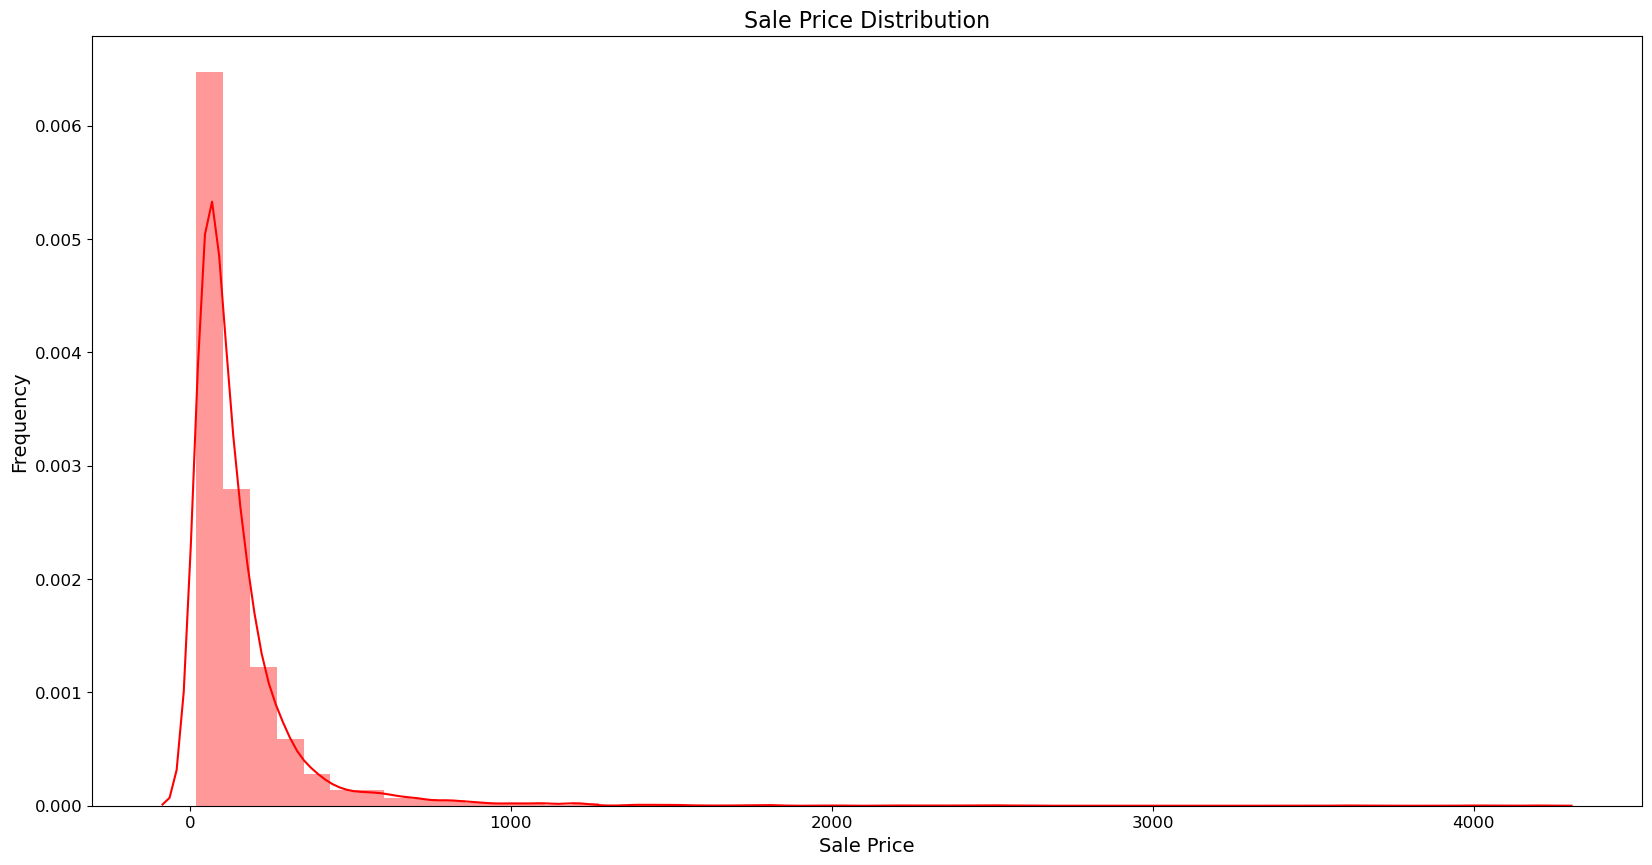

In [34]:
sns.distplot(df['Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#plt.savefig('distplot.png')
plt.show()

In [35]:
y = df['Price']

# Check the skewness and kurtosis of the target variable (y)
skewness = np.mean(y) / np.std(y)
kurtosis = np.mean((y - np.mean(y)) ** 4) / np.var(y) ** 2

print("Original data:")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Original data:
Skewness: 0.75
Kurtosis: 88.12


## Analysing the outliers

In [36]:
numerical=['Price','Area','No. of Bedrooms','Price per Area']

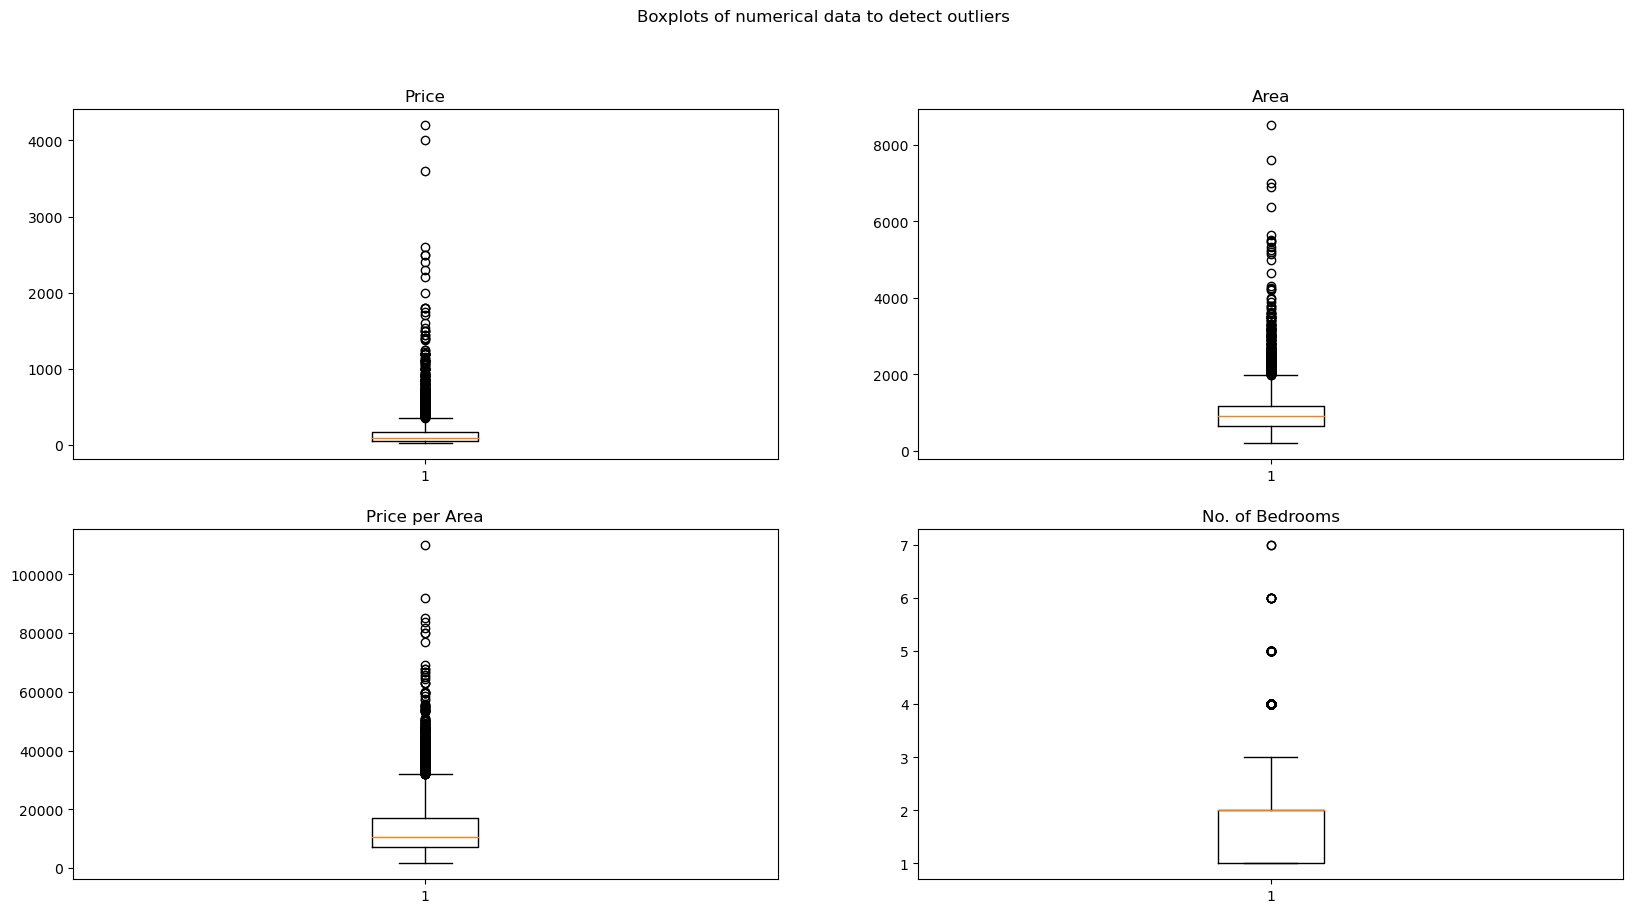

In [37]:
fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical data to detect outliers')

ax1.boxplot(df['Price']);
ax1.set_title('Price')
ax2.boxplot(df['Area']);
ax2.set_title('Area')
ax3.boxplot(df['Price per Area']);
ax3.set_title('Price per Area')

ax4.boxplot(df['No. of Bedrooms']);  
ax4.set_title('No. of Bedrooms');

#plt.savefig('boxplot-outliers.png')

In [38]:
fig.savefig('outlier_boxplot.png',dpi = 200)

## Visualising the correlation between features

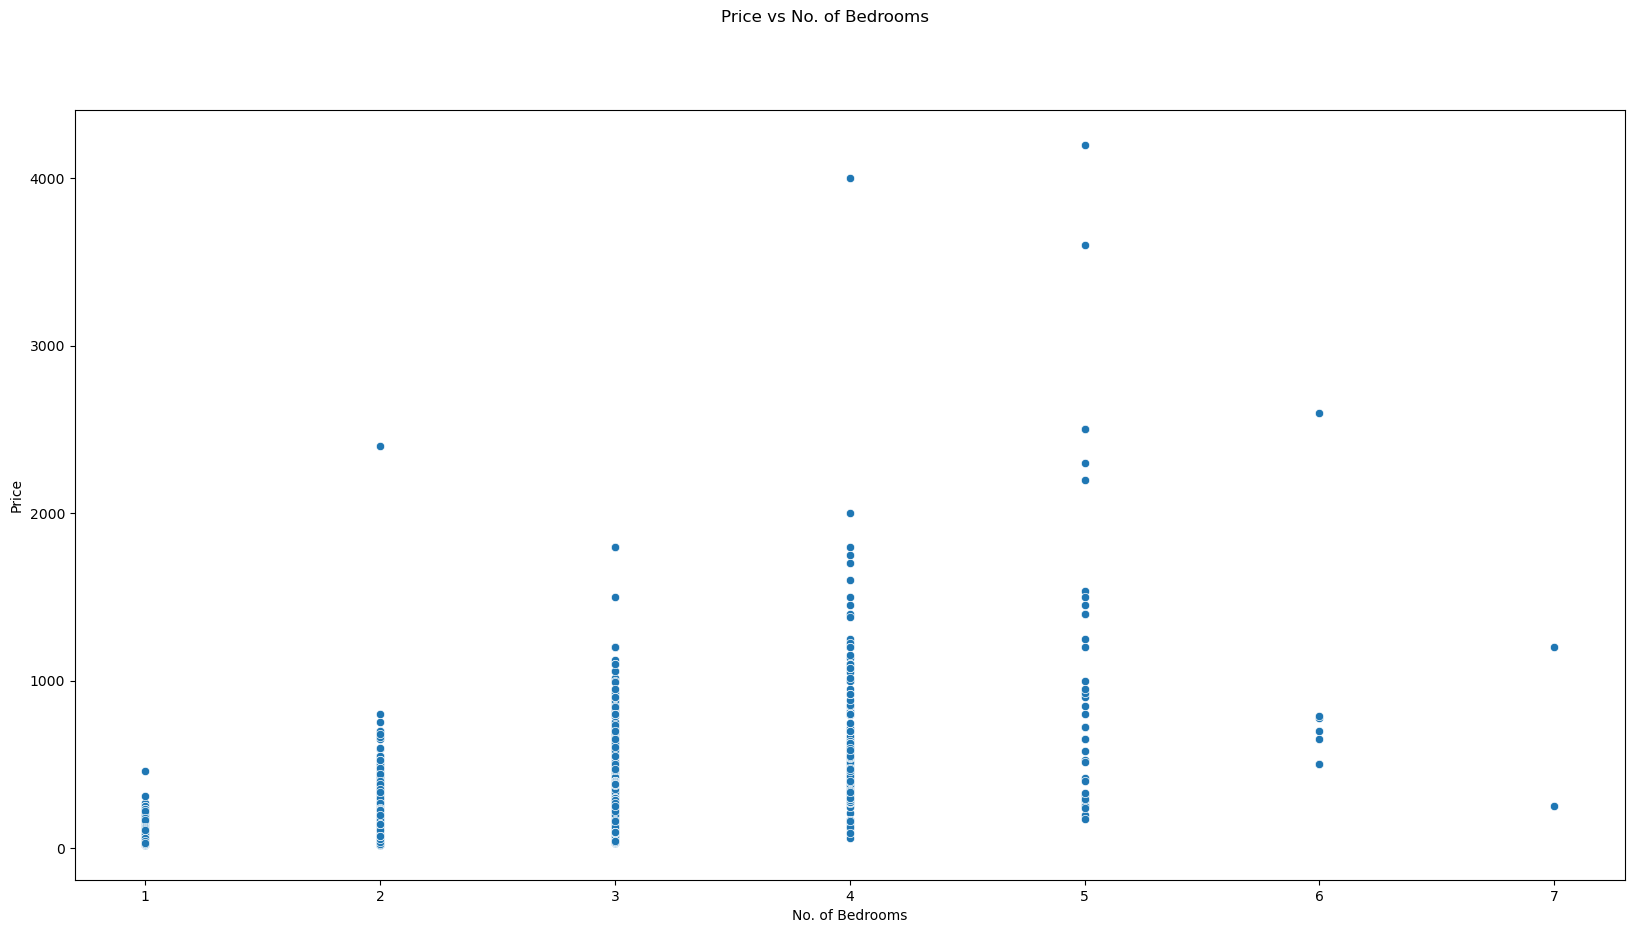

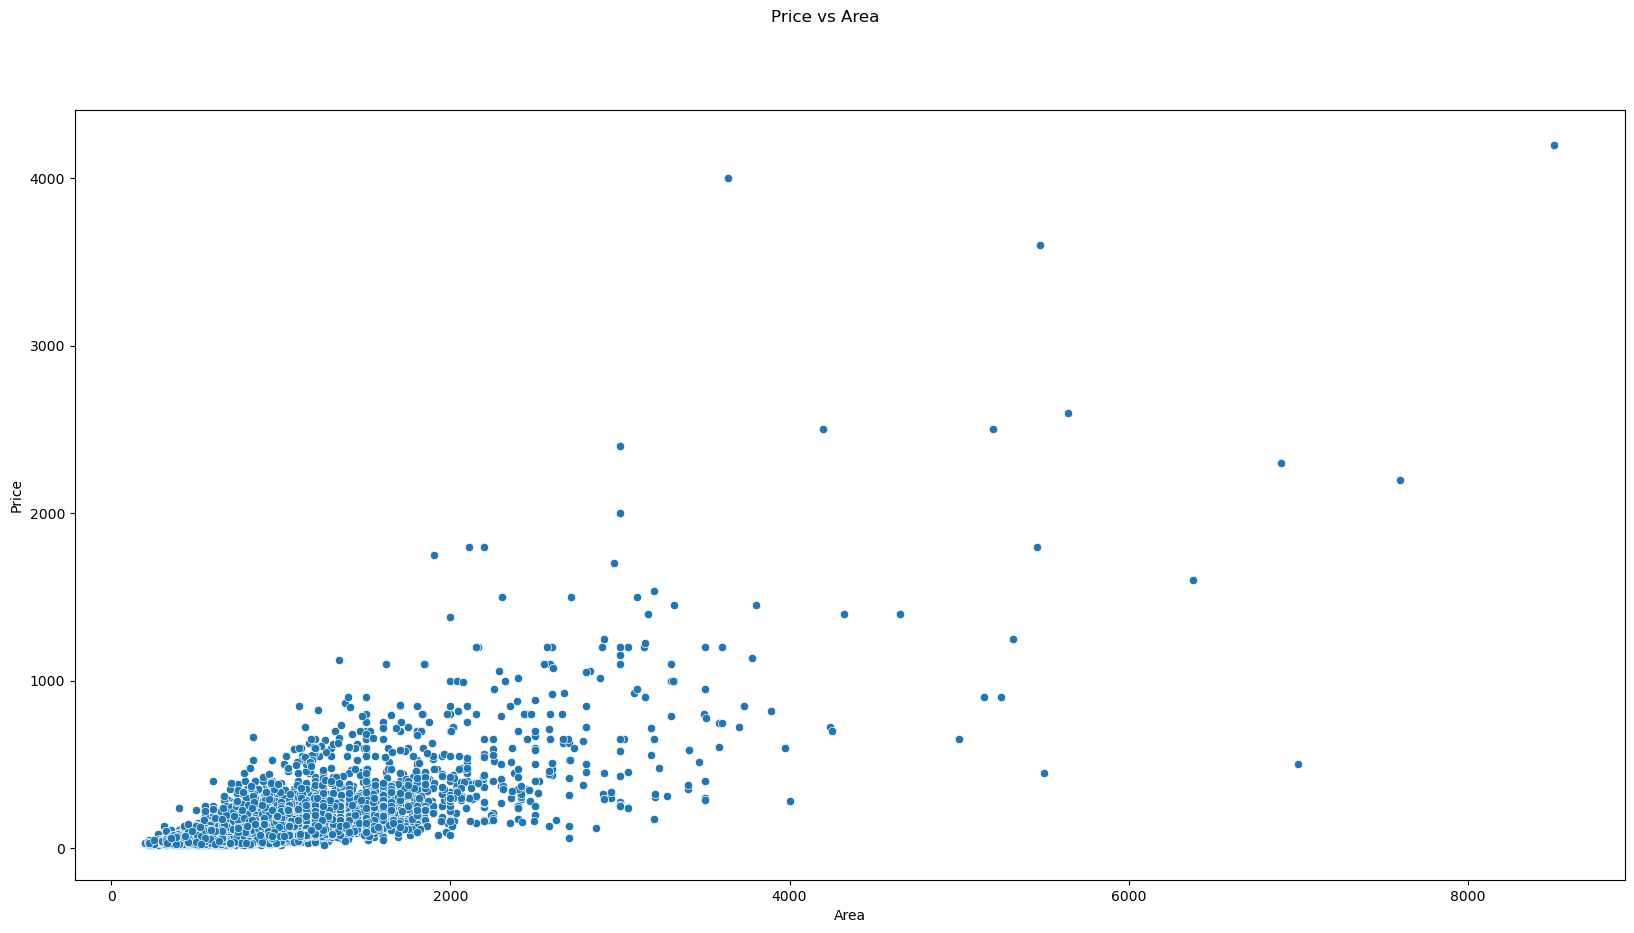

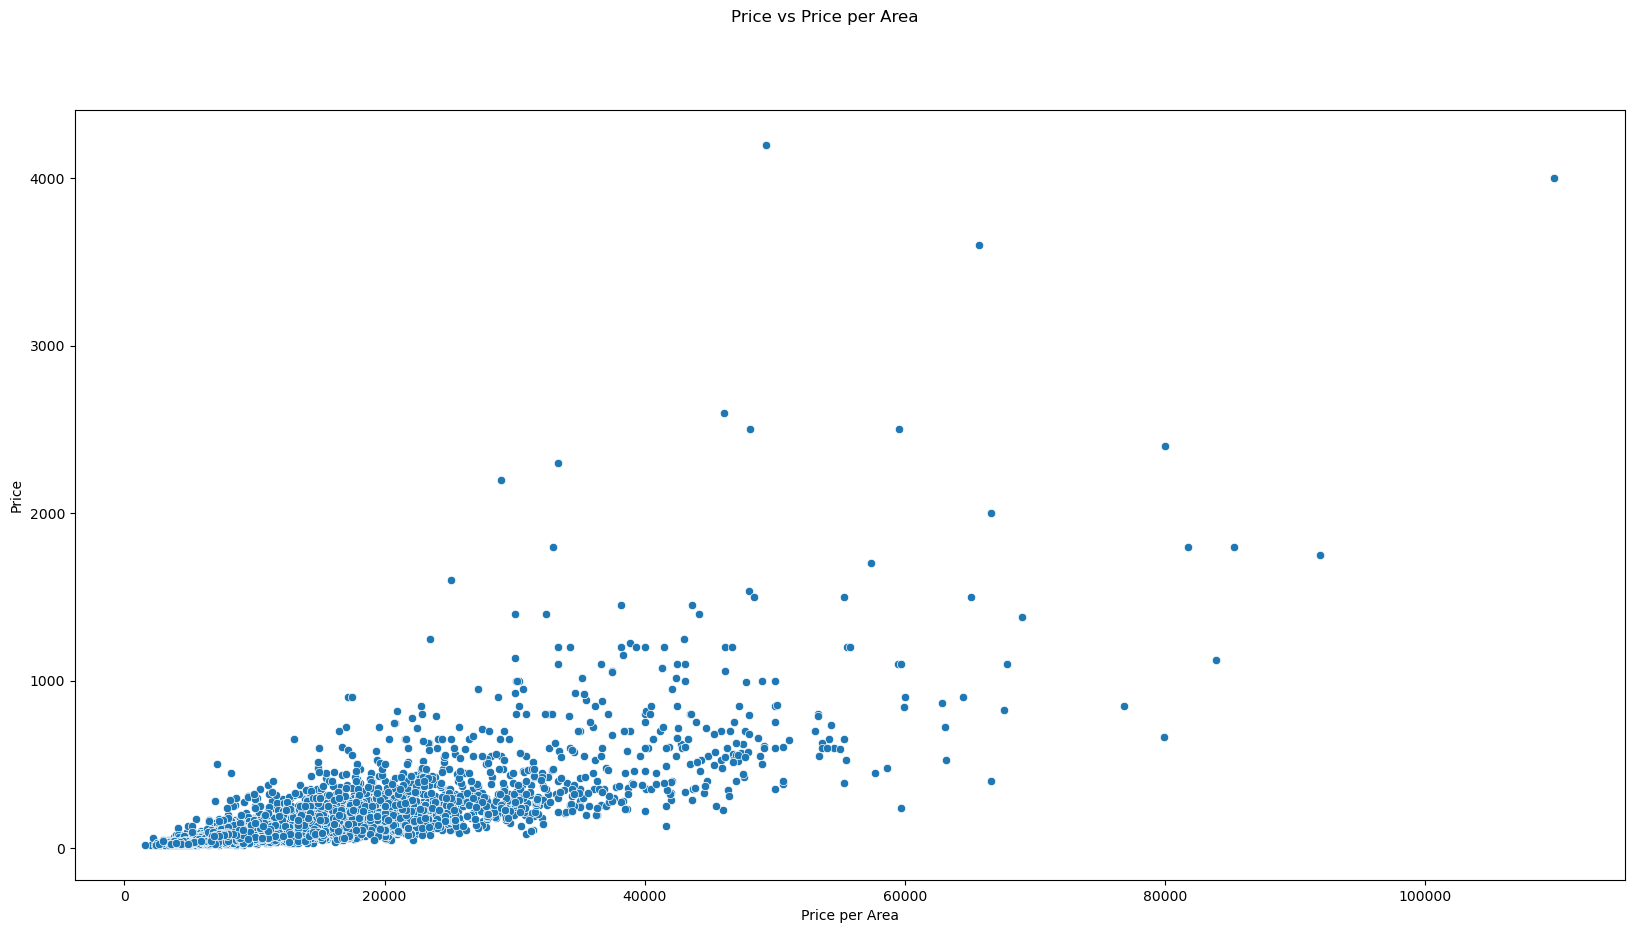

In [39]:
for i in ['No. of Bedrooms','Area','Price per Area']:
    sns.scatterplot(data=df,x=i,y='Price');
    plt.suptitle('Price vs ' +i)
    plt.show();
    #fig.savefig(i+'-Price.png',dpi = 200)
    

<Axes: >

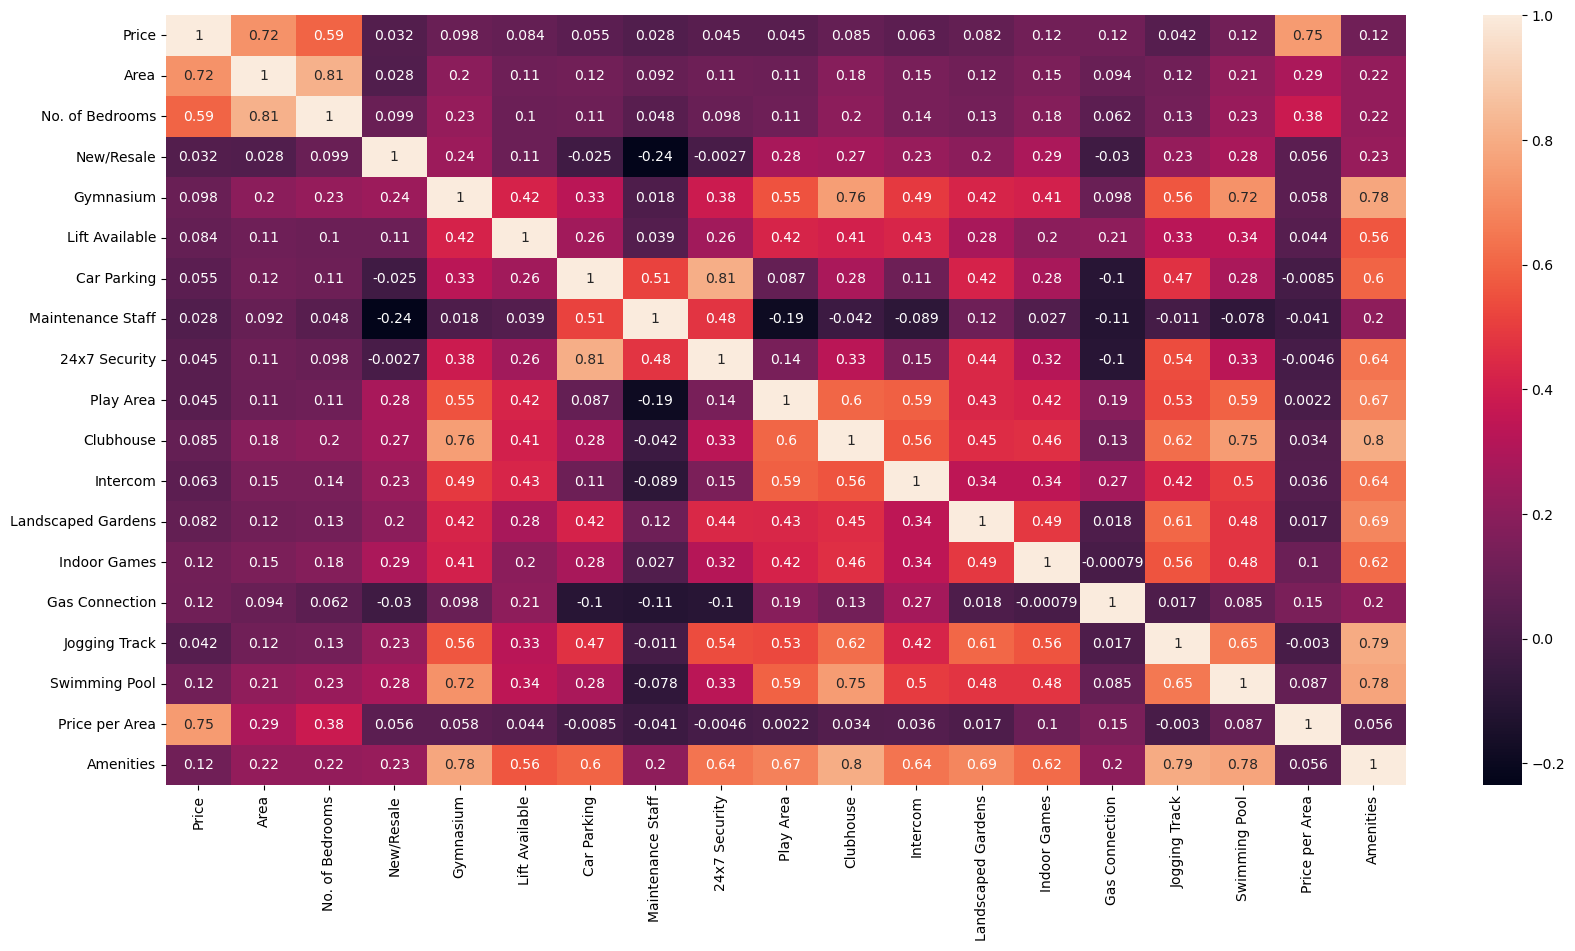

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
#fig.savefig('correlation.png',dpi = 200)

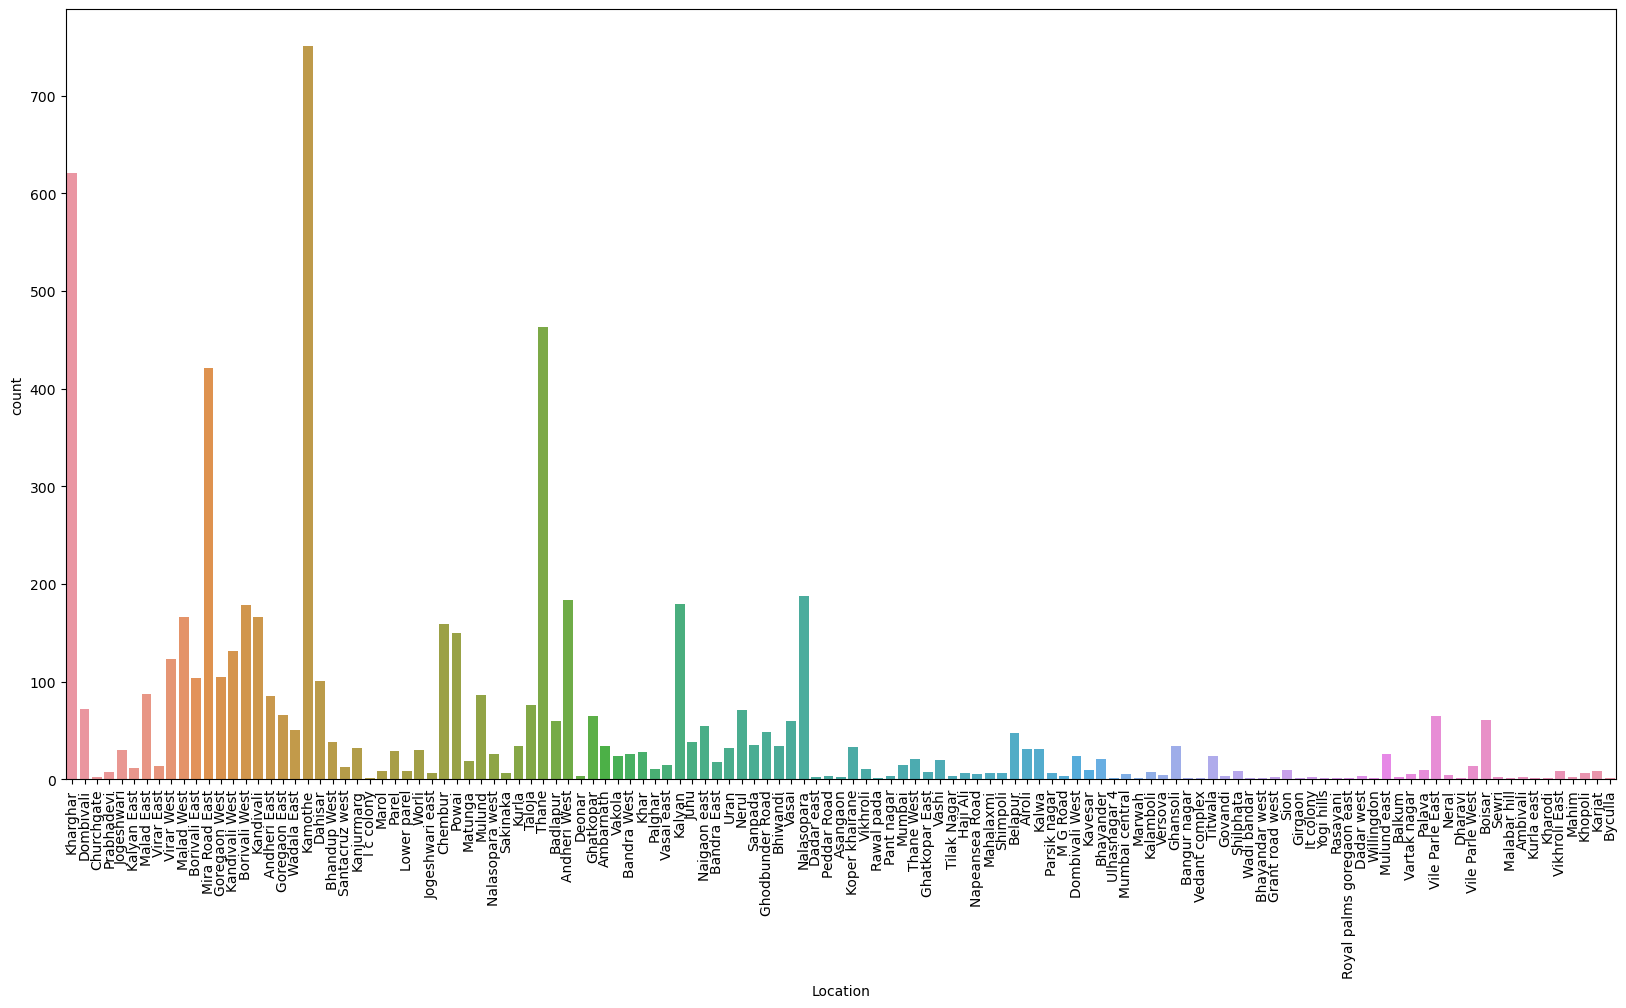

In [41]:
sns.countplot(data=df,x='Location')
plt.xticks(rotation=90);
#fig.savefig('location.png',dpi = 200)

## Outlier removal 

(Note: The basic bedroom size is taken as 120 sqft.)

In [42]:
df[(df['Area']/df['No. of Bedrooms'])<120]

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,...,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price per Area,Pincode,Amenities


In [43]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[column] >=lower_bound) & (df[column] <=upper_bound)]
    return df;
    


In [44]:
for i in ['Price','Area','No. of Bedrooms','Price per Area']:
    df=remove_outliers(df, 'Price');

In [45]:
df=remove_outliers(df, 'Price');
df=remove_outliers(df, 'Area');
df=remove_outliers(df, 'No. of Bedrooms');
df=remove_outliers(df, 'Price per Area');

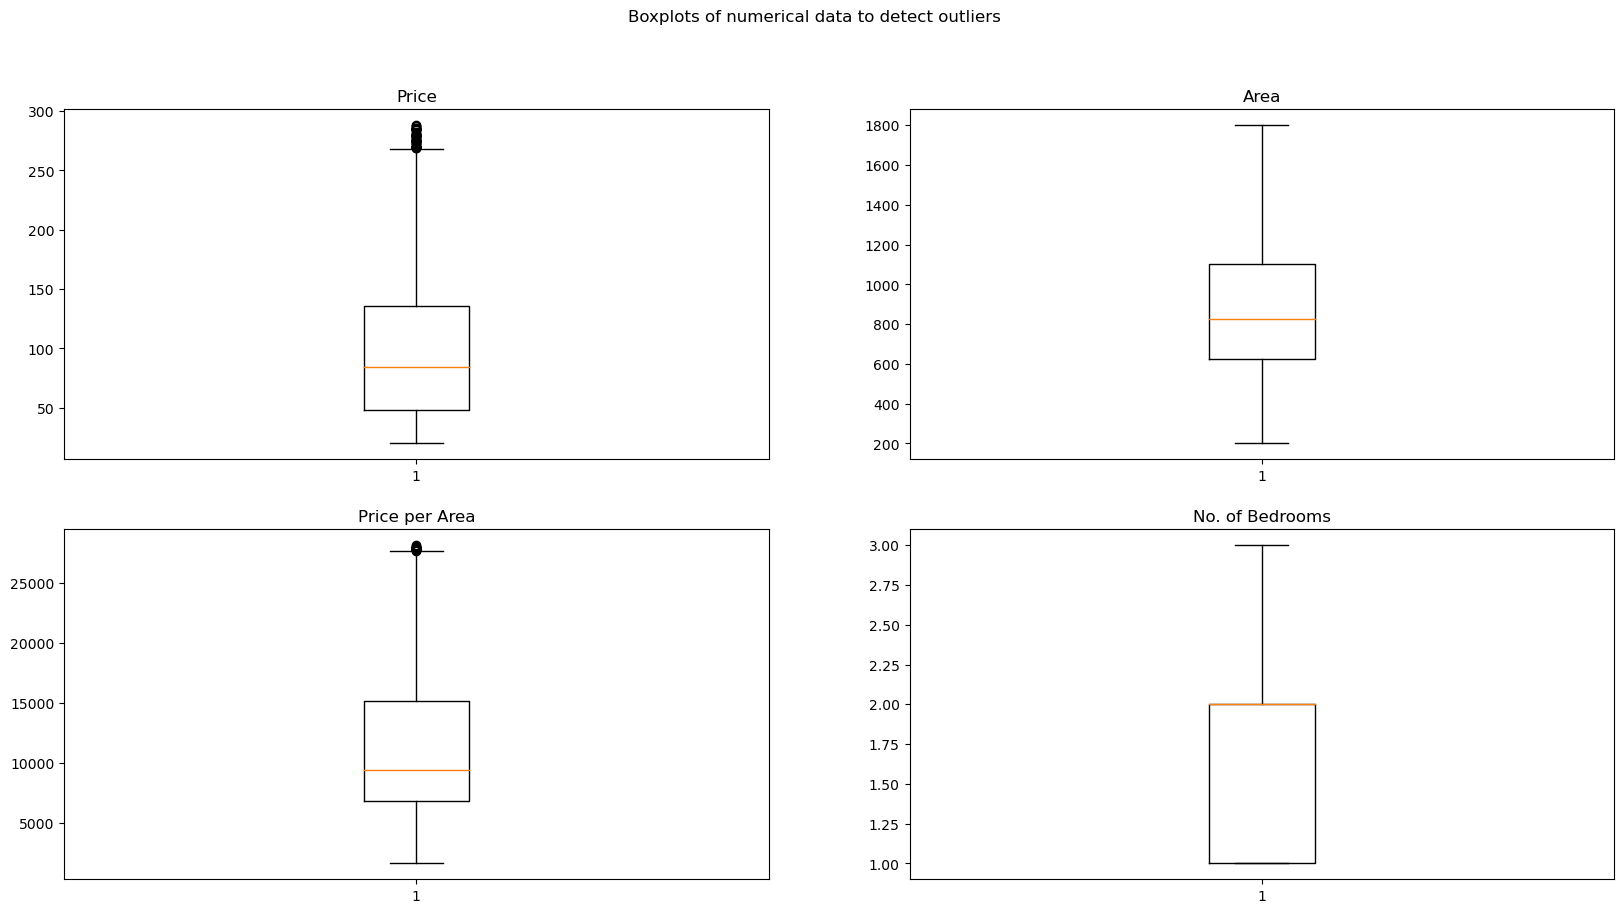

In [46]:
fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical data to detect outliers')

ax1.boxplot(df['Price']);
ax1.set_title('Price')
ax2.boxplot(df['Area']);
ax2.set_title('Area')
ax3.boxplot(df['Price per Area']);
ax3.set_title('Price per Area')

ax4.boxplot(df['No. of Bedrooms']);  
ax4.set_title('No. of Bedrooms');

#fig.savefig('after-outlier-removal.png',dpi = 200)


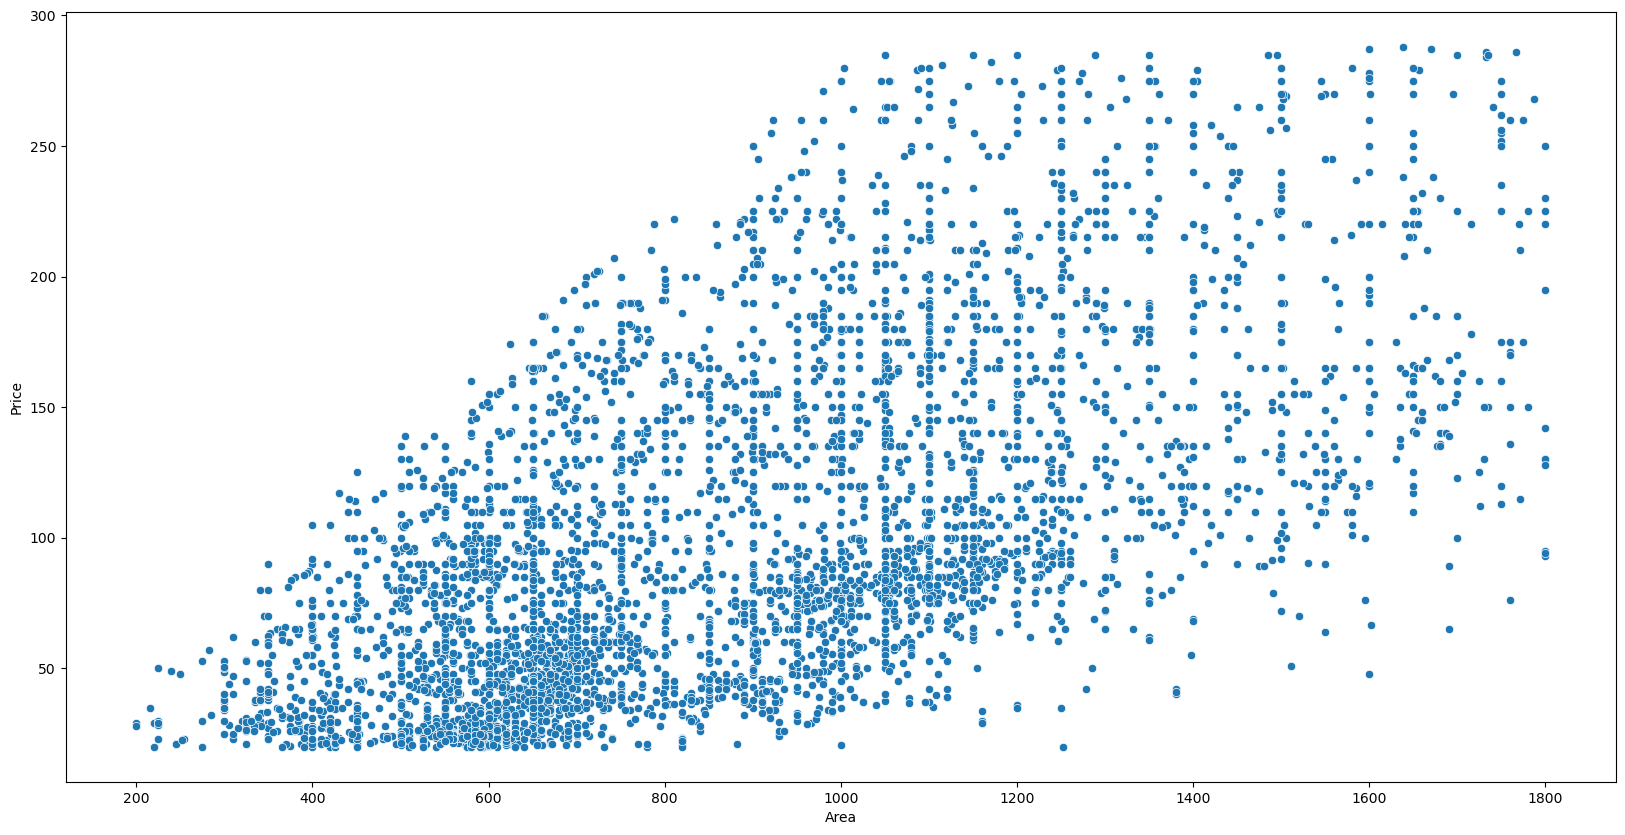

In [47]:
sns.scatterplot(data=df,x='Area',y='Price');
plt.show();
fig.savefig('Price vs Area after outlier removal1.png',dpi = 200)

## Dealing with outliers where 2bhk costs more than 3bhk for the same locality (a few rare deals)

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('No. of Bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price per Area']),
                'std': np.std(bhk_df['Price per Area']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('No. of Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['Price per Area']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [49]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['Location']==location) & (df['No. of Bedrooms']==2)]
    bhk3 = df[(df['Location']==location) & (df['No. of Bedrooms']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['Area'],bhk2['Price per Area'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['Area'],bhk3['Price per Area'],marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Area")
    plt.title(location)
    plt.legend

In [50]:
df['Location'].unique()

array(['Kharghar', 'Dombivali', 'Jogeshwari', 'Kalyan East', 'Malad East',
       'Virar East', 'Virar West', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Andheri East', 'Goregaon East', 'Kamothe', 'Dahisar',
       'Bhandup West', 'Kandivali', 'Kanjurmarg', 'I c colony', 'Marol',
       'Jogeshwari east', 'Chembur', 'Mulund', 'Nalasopara west',
       'Sakinaka', 'Powai', 'Kurla', 'Taloja', 'Badlapur', 'Deonar',
       'Thane', 'Ghatkopar', 'Ambarnath', 'Vakola', 'Palghar', 'Worli',
       'Vasai east', 'Kalyan', 'Juhu', 'Naigaon east', 'Uran', 'Nerul',
       'Sanpada', 'Ghodbunder Road', 'Bhiwandi', 'Vasai', 'Nalasopara',
       'Wadala East', 'Asangaon', 'Koper khairane', 'Vikhroli',
       'Rawal pada', 'Pant nagar', 'Andheri West', 'Parel', 'Thane West',
       'Borivali West', 'Vashi', 'Tilak Nagar', 'Shimpoli', 'Belapur',
       'Airoli', 'Kalwa', 'Parsik nagar', 'Mumbai', 'M G Road',
       'Dombivali West', 'Kavesar', 'Bha

In [51]:
#for i in df['Location'].unique():
    #plot_scatter_chart(df,i);
    #plt.show();

In [52]:
df=remove_bhk_outliers(df)

In [53]:
df.shape

(4151, 21)

In [54]:
#for i in df['Location'].unique():
    #plot_scatter_chart(df,i);
    #plt.show();

In [55]:
#few anomalies still exist

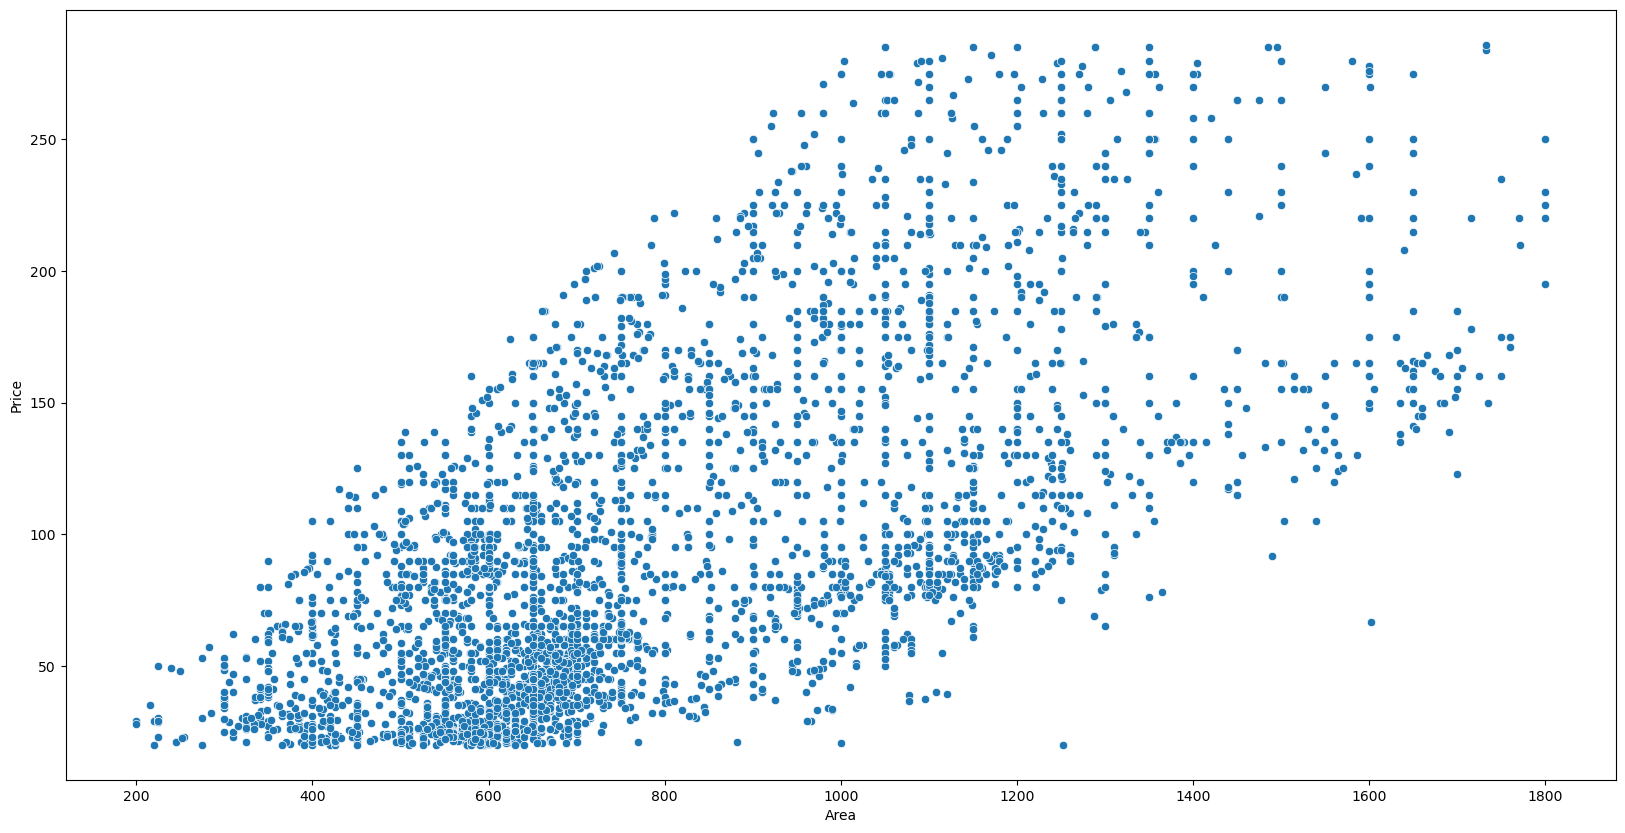

In [56]:
sns.scatterplot(data=df,x='Area',y='Price');
plt.show();
#fig.savefig('Price vs Area after outlier removal1.png',dpi = 200)

In [57]:
#Price Area Location bedrooms new/resale amenities fitness(gym and clubhouse and games and jogging track and swimming pool) 
#basic facilities(lift,maintanence,security,intercom,gas connection) extra facilities(carpark) childplayarea landscaped gardens

In [58]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool', 'Price per Area', 'Pincode', 'Amenities'],
      dtype='object')

In [59]:
print(df.shape)

(4151, 21)


In [60]:
y = df['Price']

# Check the skewness and kurtosis of the target variable (y)
skewness = np.mean(y) / np.std(y)
kurtosis = np.mean((y - np.mean(y)) ** 4) / np.var(y) ** 2

print("Original data:")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Original data:
Skewness: 1.50
Kurtosis: 3.30


## Encoding the categorical data

In [61]:
dummies=pd.get_dummies(df['Location'],drop_first=True)

In [62]:
df=pd.concat([df,dummies],axis='columns')

In [63]:
y=df['Price']
X=df.drop(['Location','Pincode','Price'],axis=1)

In [64]:
X.head()

,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Play Area,Clubhouse,...,Vikhroli,Vikhroli East,Vile Parle East,Vile Parle West,Virar East,Virar West,Wadala East,Wadi bandar,Worli,Yogi hills
0,720,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,650,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,650,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,665,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split the data into train and test sets

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('X train : ' ,X_train.shape)
print('X test : ' ,X_test.shape)
print('Y train : ' ,y_train.shape)
print('Y test : ' ,y_test.shape)

X train :  (3320, 124)
X test :  (831, 124)
Y train :  (3320,)
Y test :  (831,)


## Scaling the data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.89859721, -0.81873998, -0.69055653, ..., -0.01735787,
        -0.02455143, -0.01735787],
       [ 0.85888201,  0.68055221,  1.44810736, ..., -0.01735787,
        -0.02455143, -0.01735787],
       [-0.96554879, -0.81873998,  1.44810736, ..., -0.01735787,
        -0.02455143, -0.01735787],
       ...,
       [-0.71448034, -0.81873998, -0.69055653, ..., -0.01735787,
        -0.02455143, -0.01735787],
       [-0.09183056,  0.68055221,  1.44810736, ..., -0.01735787,
        -0.02455143, -0.01735787],
       [-1.01576249, -0.81873998,  1.44810736, ..., -0.01735787,
        -0.02455143, -0.01735787]])

In [67]:
#pip install catboost

In [68]:
#pip install xgboost

## Models

In [69]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [70]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [71]:
def model_evaluation(model):
    model.fit(X_train, y_train)
    y_train_pred= model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)
    

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()
    fig.savefig('model'+i+'.png',dpi = 200)
    

## Linear Regression

R2 Score of the LinearRegression() model is=> -11.18463018522541
Adjusted R2 Score of the LinearRegression() model is=> -13.324706874981715

MAE of LinearRegression() model is=> 19.1547017726846
MSE of LinearRegression() model is=> 48373.47044590154
RMSE of LinearRegression() model is=> 219.9396972942846


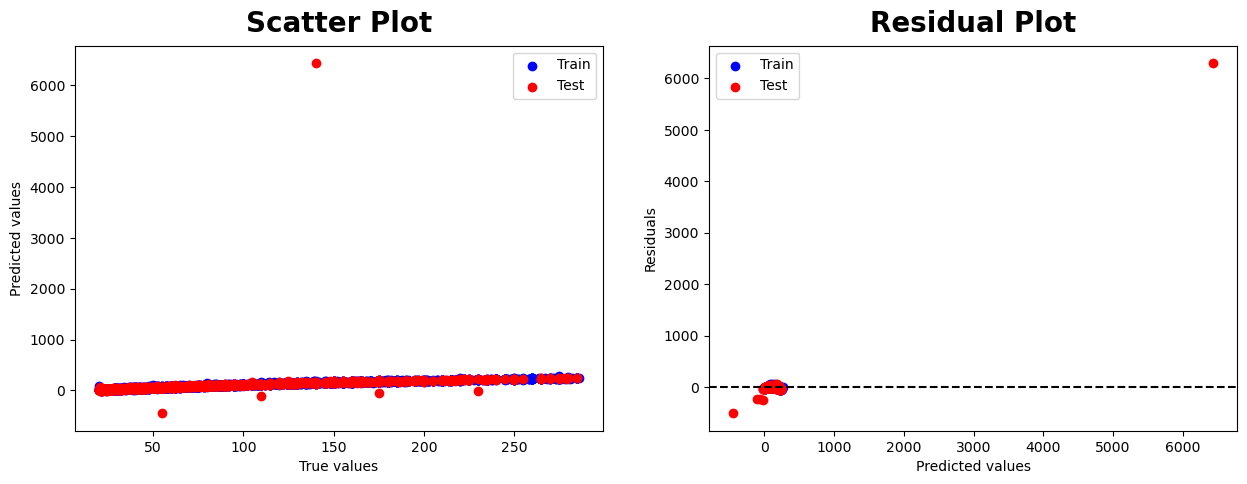

In [72]:
model_evaluation(LinearRegression())

## Support Vector Regression

R2 Score of the SVR() model is=> 0.6450632341305786
Adjusted R2 Score of the SVR() model is=> 0.5827230656209352

MAE of SVR() model is=> 26.016094015486694
MSE of SVR() model is=> 1409.113193666509
RMSE of SVR() model is=> 37.538156503303526


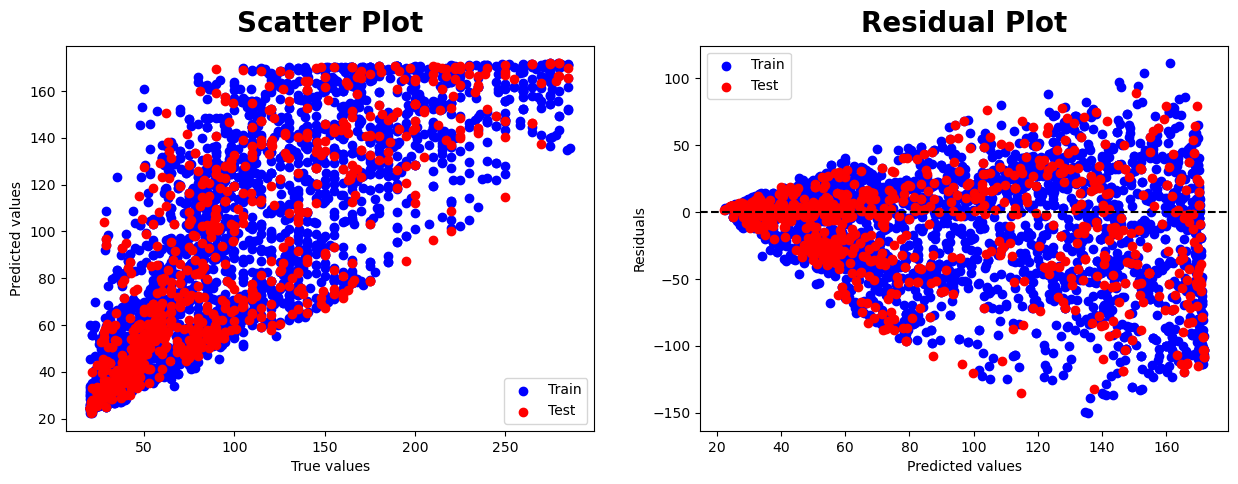

In [73]:
model_evaluation(SVR())

## Random Forest Regressor

R2 Score of the RandomForestRegressor(random_state=101) model is=> 0.9989409506202863
Adjusted R2 Score of the RandomForestRegressor(random_state=101) model is=> 0.9987549419473621

MAE of RandomForestRegressor(random_state=101) model is=> 1.031094961371841
MSE of RandomForestRegressor(random_state=101) model is=> 4.204468505942147
RMSE of RandomForestRegressor(random_state=101) model is=> 2.0504800671896684


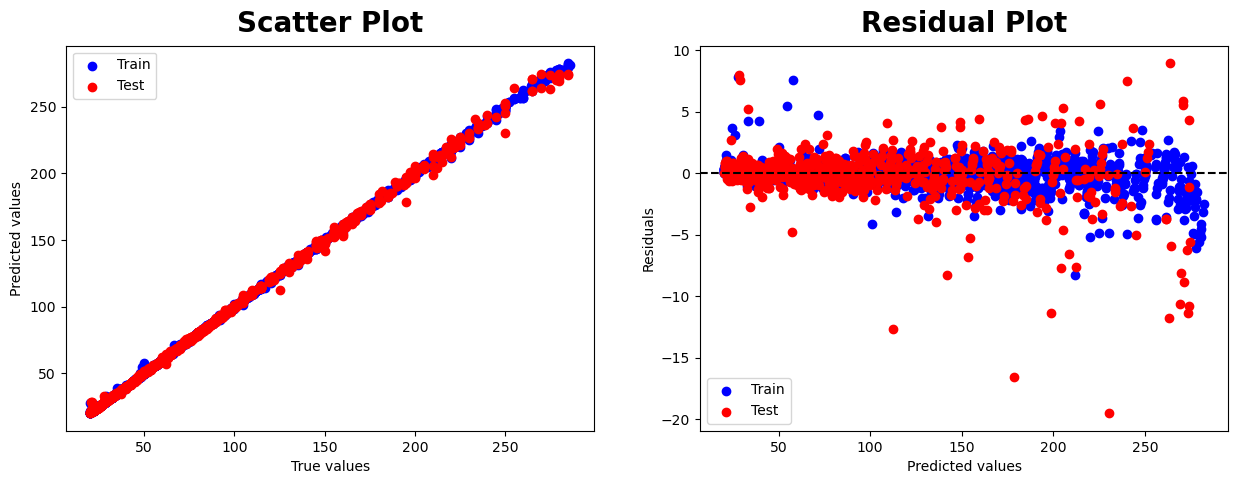

In [74]:
model_evaluation(RandomForestRegressor(random_state=101))

## AdaBoost Regressor

R2 Score of the AdaBoostRegressor(random_state=101) model is=> 0.9477122326045295
Adjusted R2 Score of the AdaBoostRegressor(random_state=101) model is=> 0.938528545413257

MAE of AdaBoostRegressor(random_state=101) model is=> 11.652307498385294
MSE of AdaBoostRegressor(random_state=101) model is=> 207.58453332904114
RMSE of AdaBoostRegressor(random_state=101) model is=> 14.407794186794908


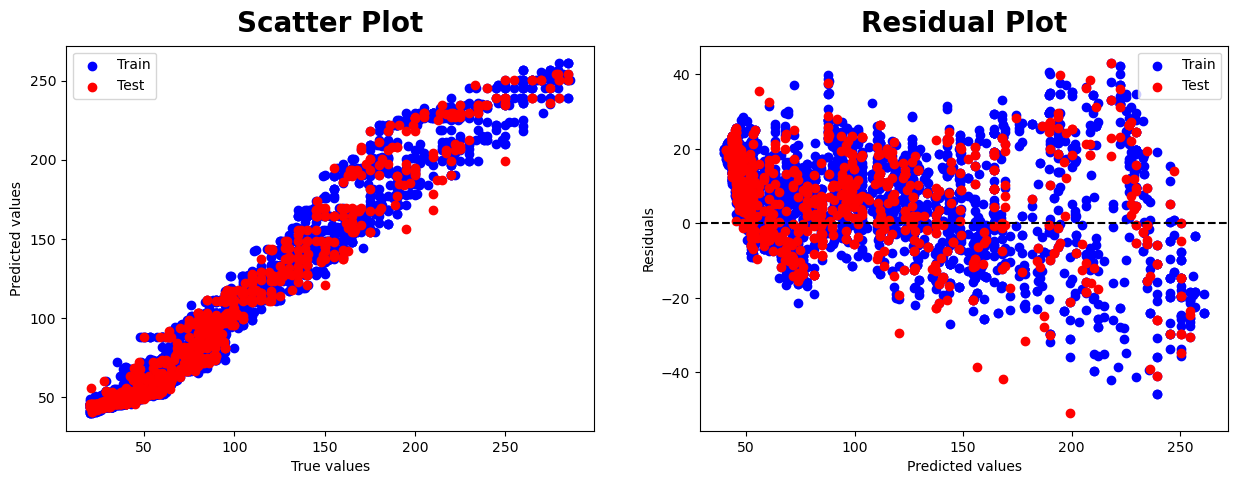

In [75]:
model_evaluation(AdaBoostRegressor(random_state=101))

## Gradient Boosting Regressor

R2 Score of the GradientBoostingRegressor(random_state=101) model is=> 0.9967576503491079
Adjusted R2 Score of the GradientBoostingRegressor(random_state=101) model is=> 0.9961881725067416

MAE of GradientBoostingRegressor(random_state=101) model is=> 2.4502872529095483
MSE of GradientBoostingRegressor(random_state=101) model is=> 12.872258134095192
RMSE of GradientBoostingRegressor(random_state=101) model is=> 3.587792933558902


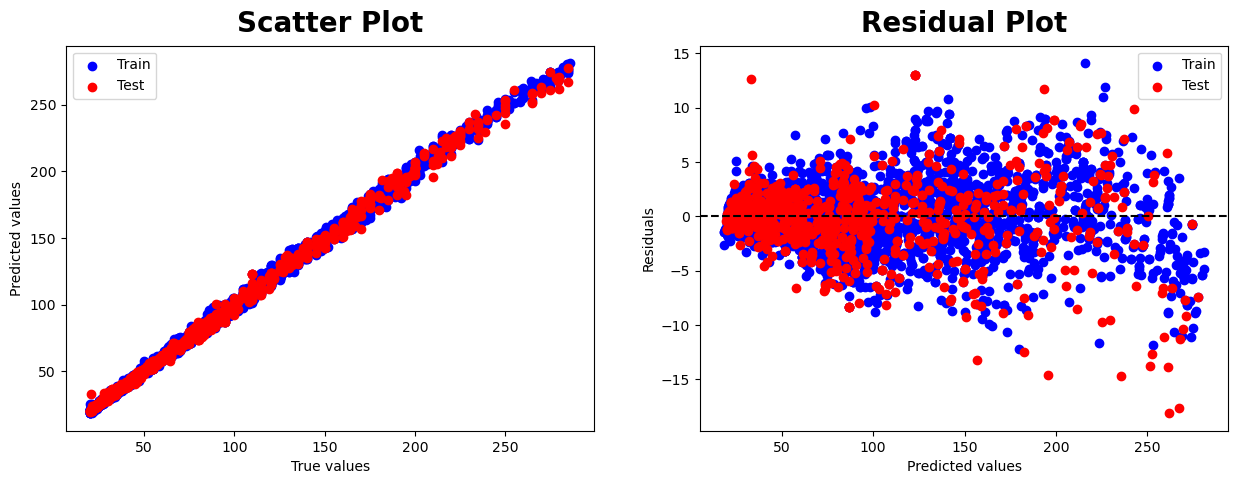

In [76]:
model_evaluation(GradientBoostingRegressor(random_state=101))

In [77]:
#categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_columns]

#model_evaluation(XGBRegressor(categorical_feature=categorical_feature_indices))

## CatBoost Regressor

In [78]:
categorical_columns = ['New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
                       'Maintenance Staff', '24x7 Security', 'Play Area',
                       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
                       'Gas Connection', 'Jogging Track', 'Swimming Pool', 'Amenities']

In [79]:
cat_features = categorical_columns

In [80]:
model=CatBoostRegressor(verbose=False,random_state=101)

R2 Score of the <catboost.core.CatBoostRegressor object at 0x00000233F3E9C940> model is=> 0.9994964412153318
Adjusted R2 Score of the <catboost.core.CatBoostRegressor object at 0x00000233F3E9C940> model is=> 0.9994079974627839

MAE of <catboost.core.CatBoostRegressor object at 0x00000233F3E9C940> model is=> 0.8443256422912929
MSE of <catboost.core.CatBoostRegressor object at 0x00000233F3E9C940> model is=> 1.999148568124543
RMSE of <catboost.core.CatBoostRegressor object at 0x00000233F3E9C940> model is=> 1.4139125037018885


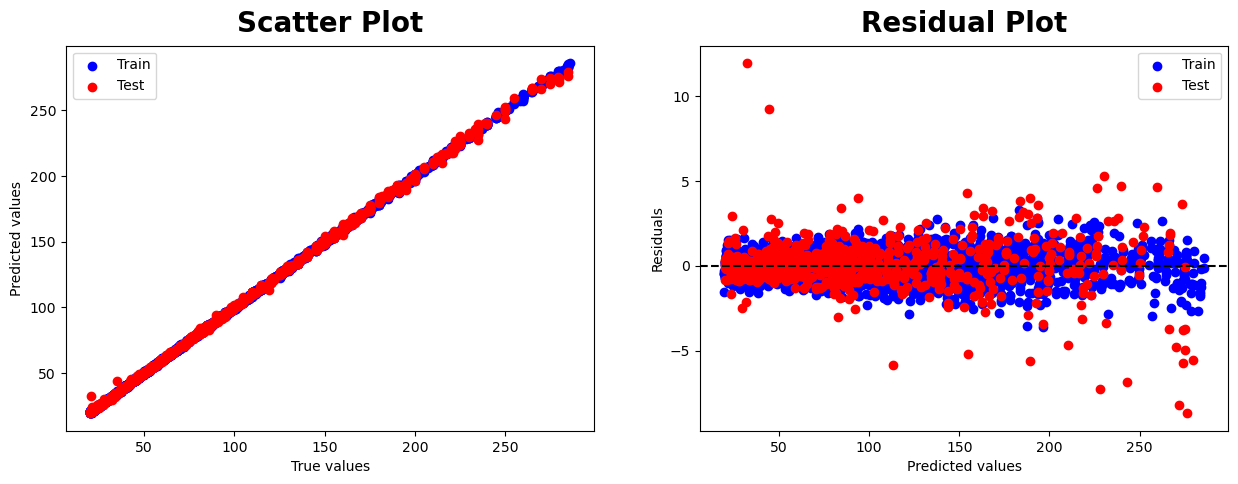

In [81]:
model_evaluation(model)

## Error analysis

In [82]:
algos = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBosstRegressor"
         ,"CatBoostRegressor"]

In [83]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [84]:
sorted_df=new_df.sort_values(by=['R2_Score','Adjusted_R2_Score','MAE','MSE','RMSE'],ascending=[False,False,True,True,True])
# highest R2 & Adjusted_R2 Scores and lowest MAE,MSE,RMSE values.
sorted_df

,Model,R2_Score,Adjusted_R2_Score,MAE,MSE,RMSE
5,CatBoostRegressor,0.999496,0.999408,0.844326,1.999149,1.413913
2,RandomForestRegresor,0.998941,0.998755,1.031095,4.204469,2.050480
4,GradientBosstRegressor,0.996758,0.996188,2.450287,12.872258,3.587793
3,AdaBoostRegressor,0.947712,0.938529,11.652307,207.584533,14.407794
1,SVR,0.645063,0.582723,26.016094,1409.113194,37.538157
0,LinearRegression,-11.184630,-13.324707,19.154702,48373.470446,219.939697


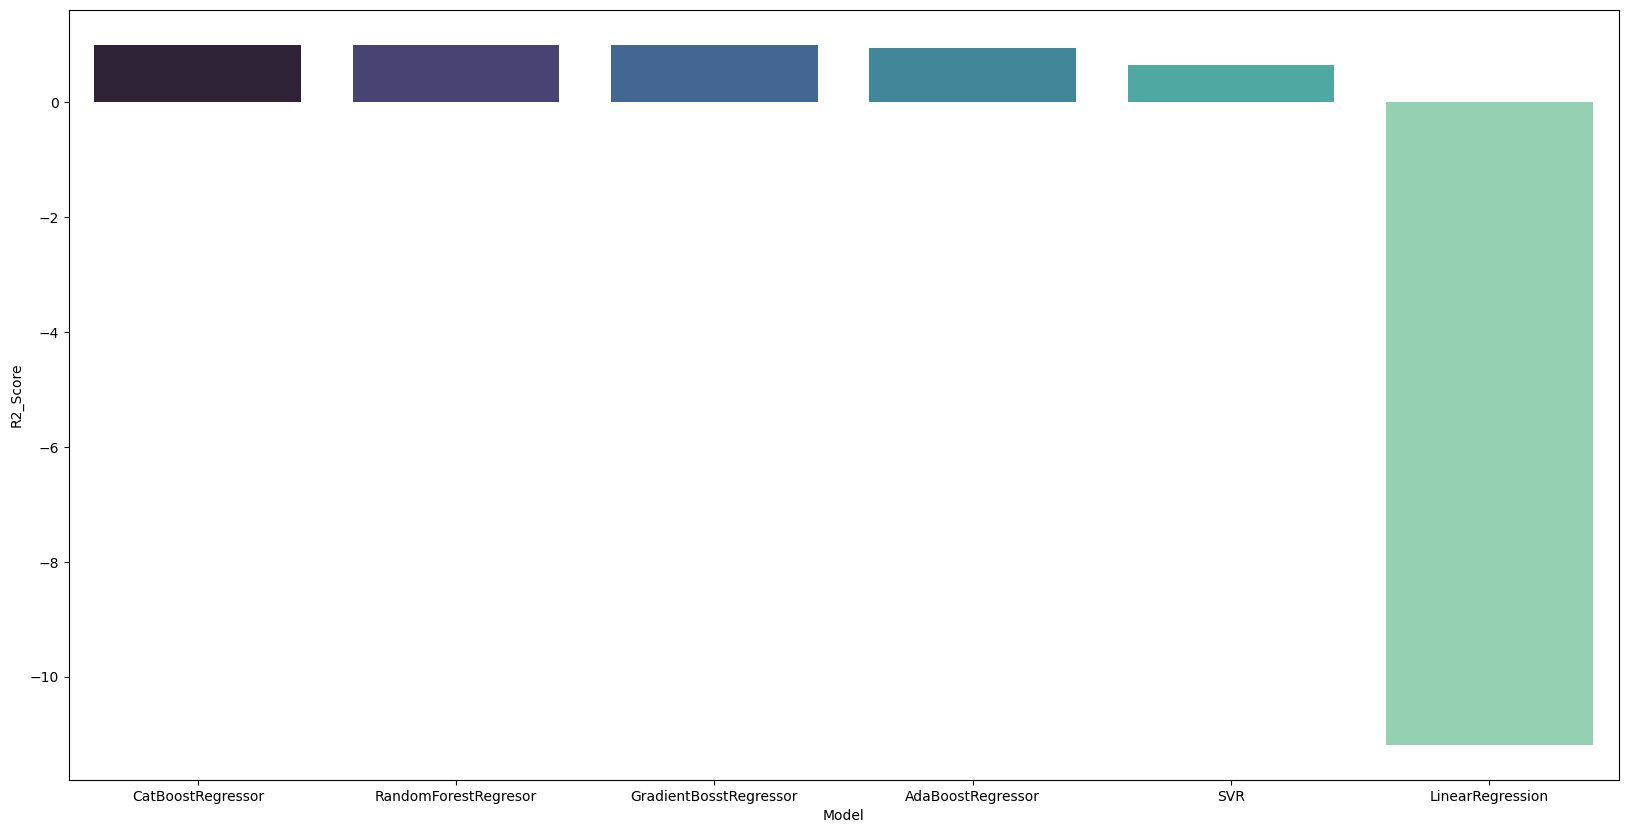

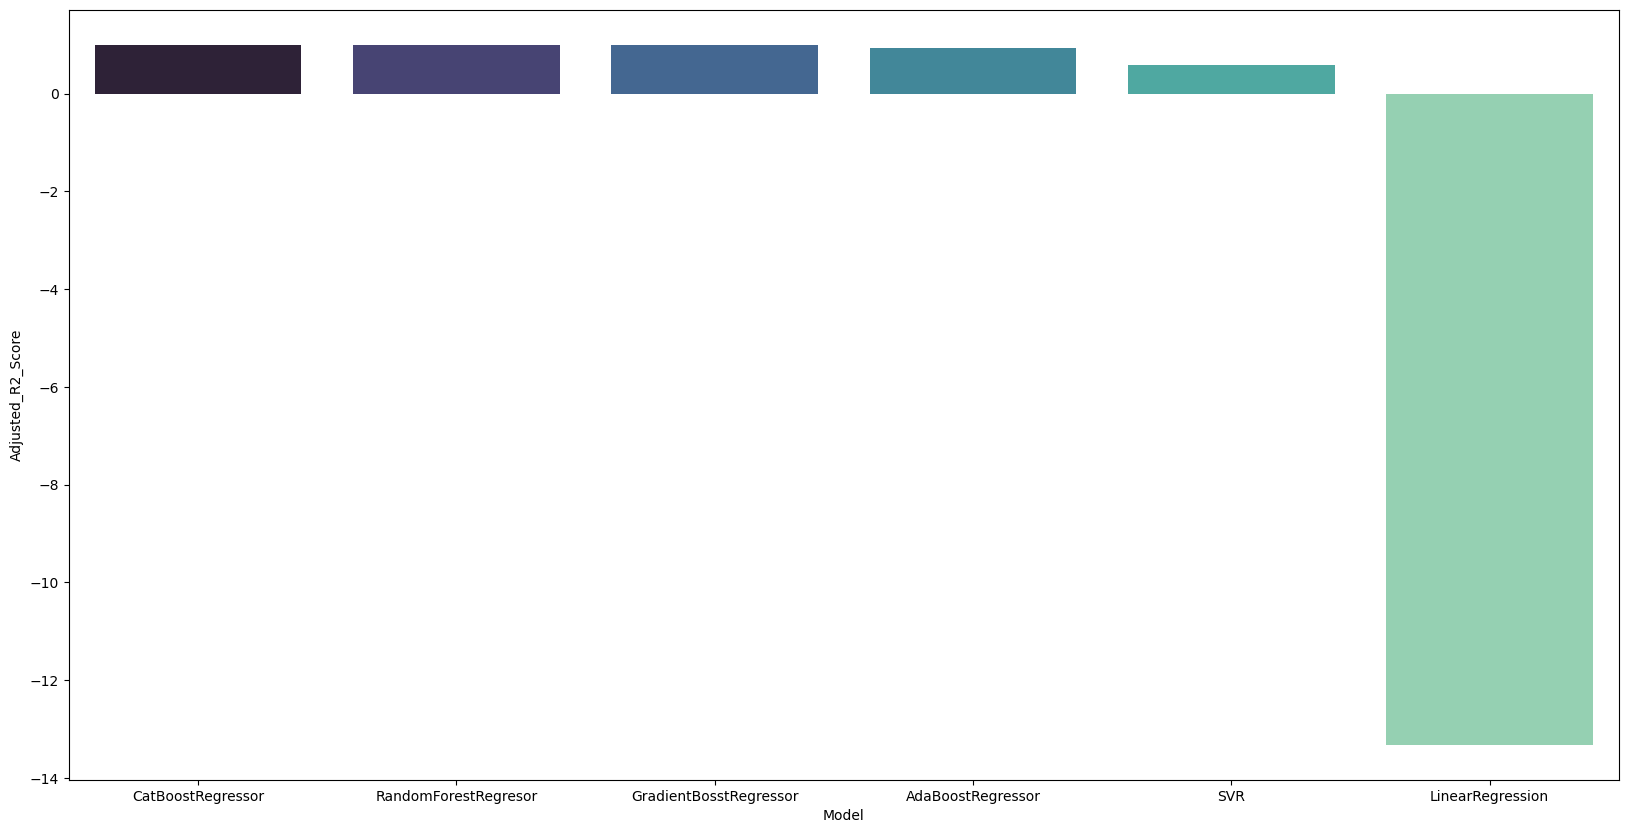

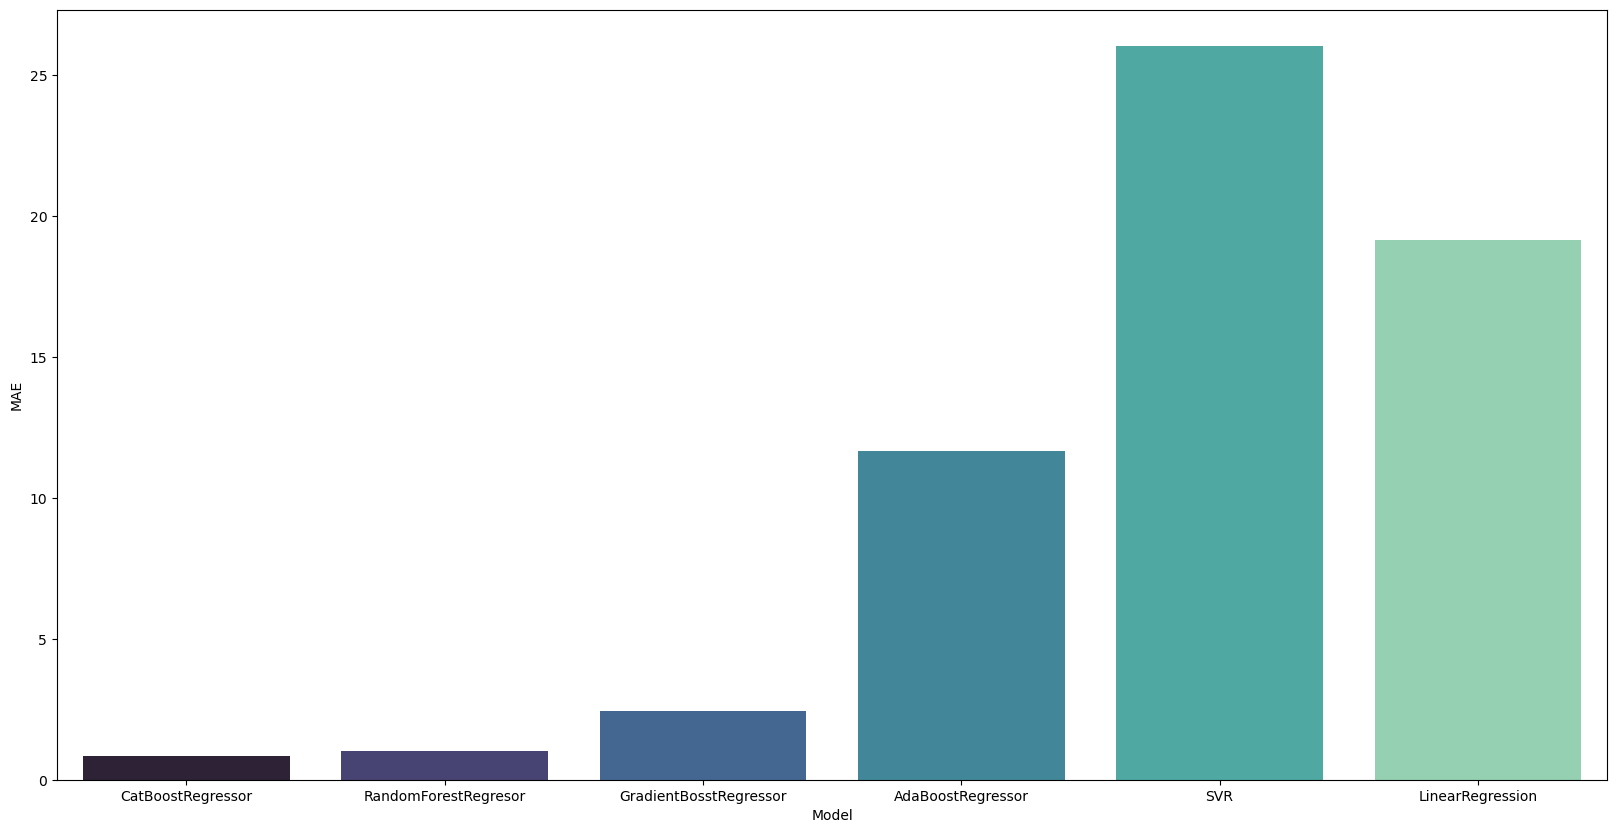

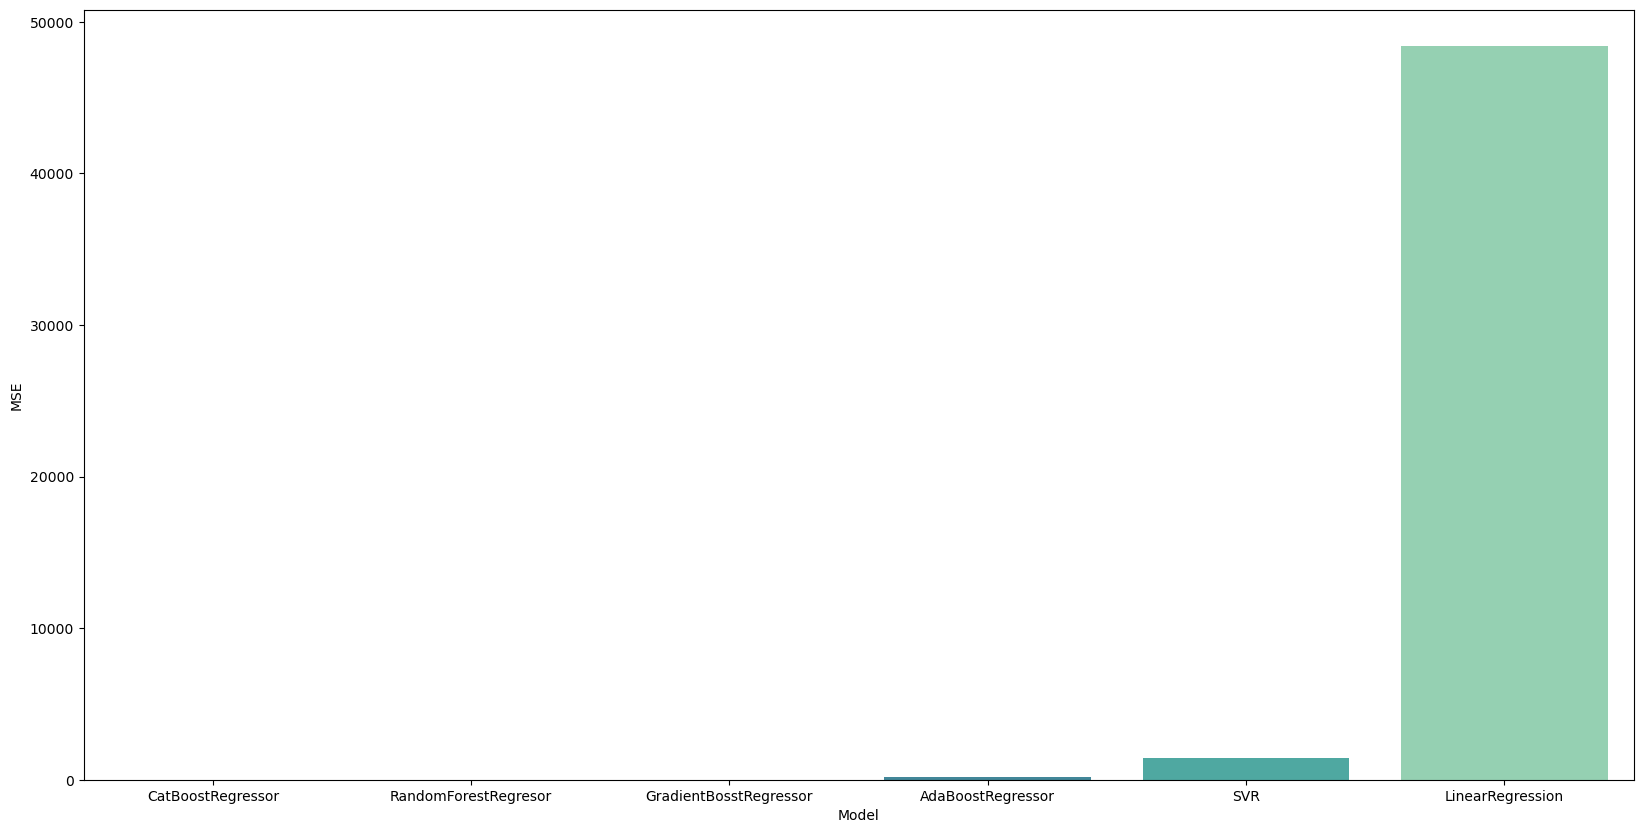

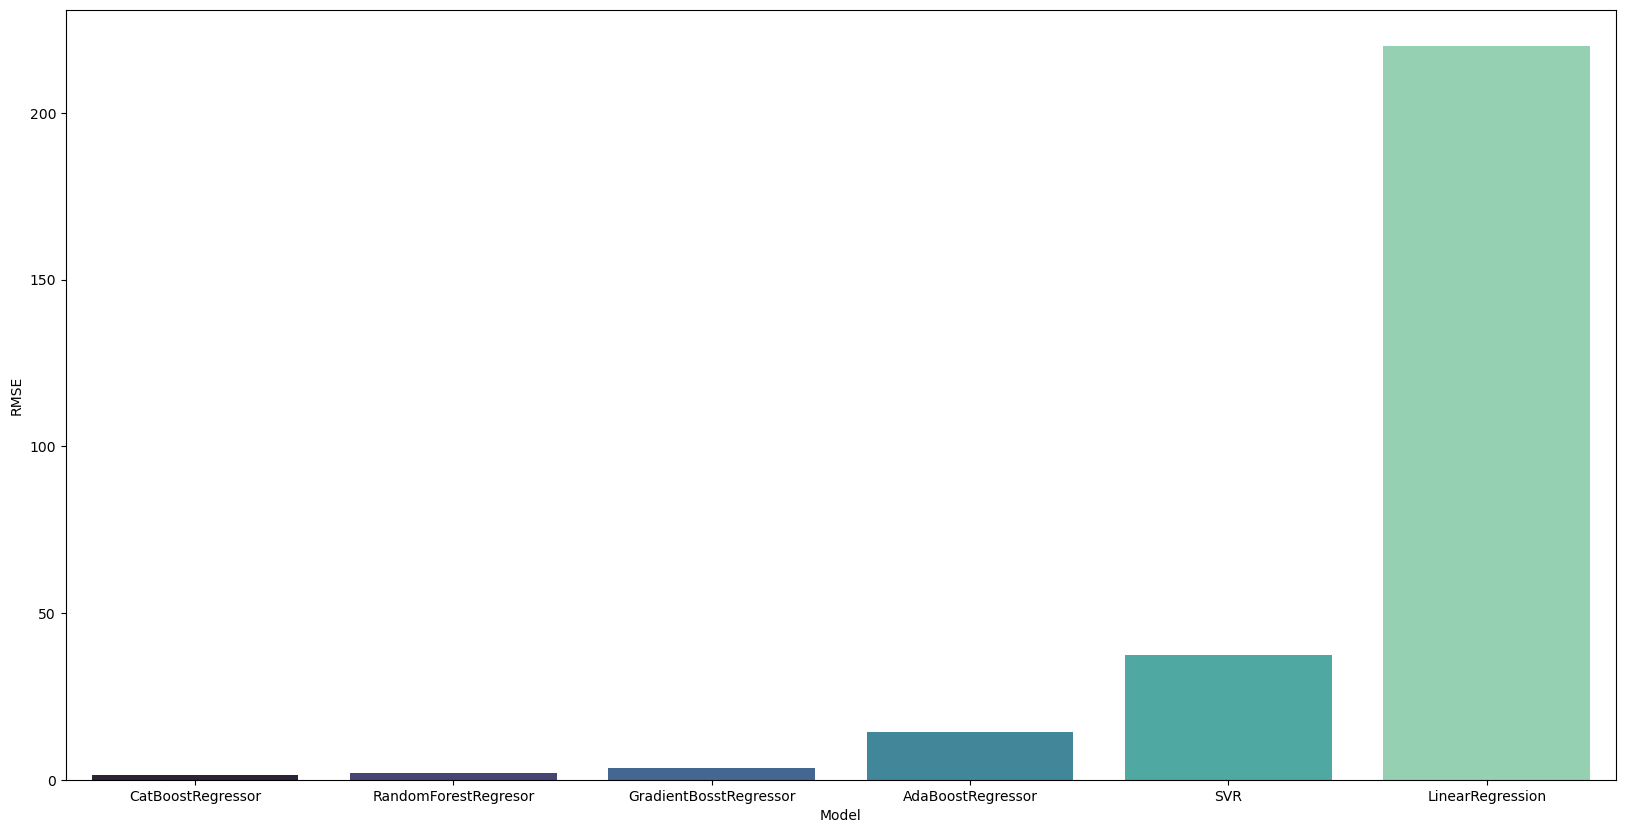

In [85]:
for i in ['R2_Score','Adjusted_R2_Score','MAE','MSE','RMSE']:
    sns.barplot(data=sorted_df,x='Model',y=i,palette='mako')
    plt.show();
    fig.savefig('analysis'+i+'.png',dpi = 200)
    


In [86]:
## Shap

In [87]:
import shap

In [88]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 832it [02:27,  5.50it/s]                         


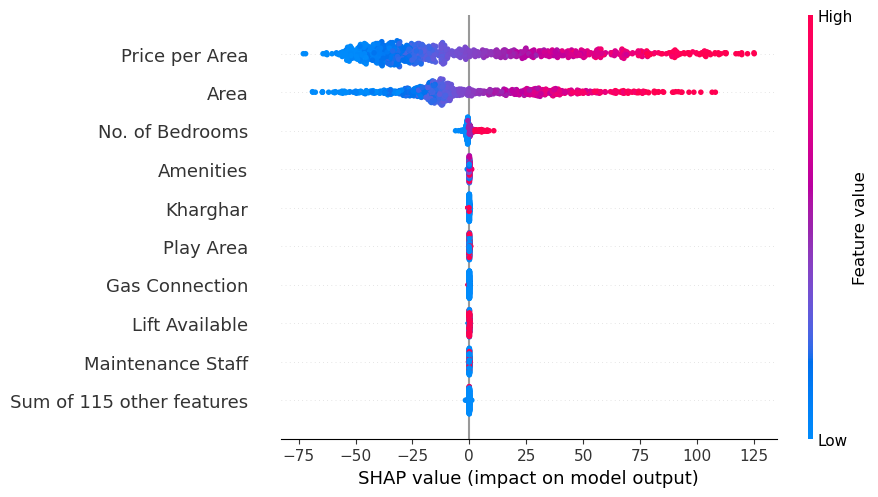

In [89]:
shap.plots.beeswarm(shap_values)
fig.savefig('shap_beeswarm.png',dpi = 200)

## Fine tuning the model

In [90]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [91]:
catboost_model = CatBoostRegressor(verbose=False,random_state=101)

In [92]:
parameters = {
    "n_estimators": [50,100,250,500],
    "learning_rate": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5]
}

In [93]:
random_search = RandomizedSearchCV(
    catboost_model, parameters, random_state=101)

In [94]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x00000233FEA9E290>,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.5],
                                        'n_estimators': [50, 100, 250, 500]},
                   random_state=101)

In [95]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 0.1}
Best Score: 0.9991985921717148


In [96]:
catboost_model = CatBoostRegressor(n_estimators= 500, learning_rate=0.1,verbose=False,random_state=101)

In [97]:
catboost_model.fit(X_train,y_train)

R2 Score of the <catboost.core.CatBoostRegressor object at 0x00000233FEB850F0> model is=> 0.9993896204336425
Adjusted R2 Score of the <catboost.core.CatBoostRegressor object at 0x00000233FEB850F0> model is=> 0.9992824149573984

MAE of <catboost.core.CatBoostRegressor object at 0x00000233FEB850F0> model is=> 1.0132375686177055
MSE of <catboost.core.CatBoostRegressor object at 0x00000233FEB850F0> model is=> 2.4232313550045803
RMSE of <catboost.core.CatBoostRegressor object at 0x00000233FEB850F0> model is=> 1.5566731689743292


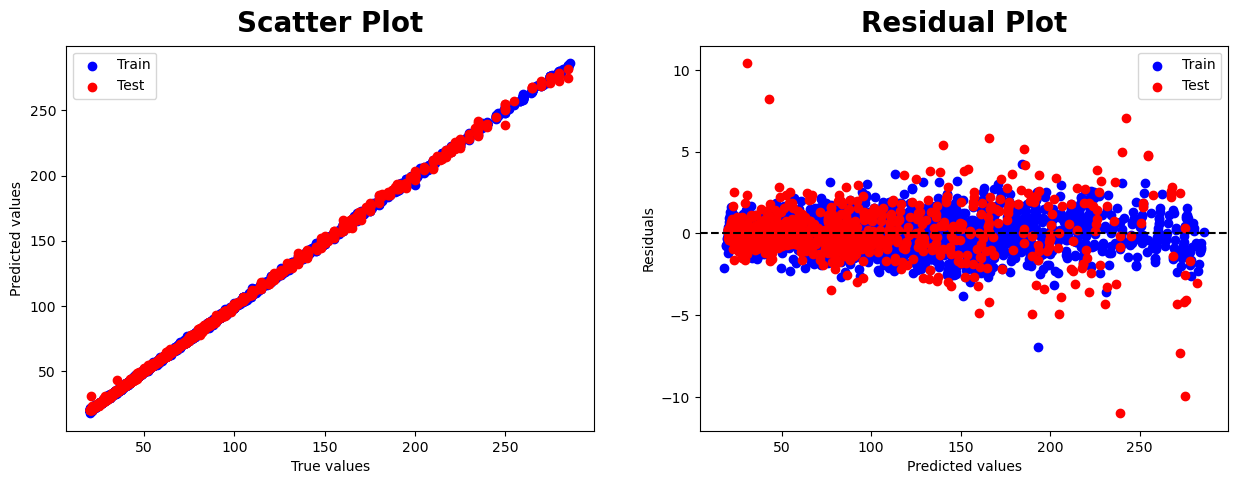

In [98]:
model_evaluation(catboost_model)

In [99]:
explainer = shap.Explainer(catboost_model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 832it [02:14,  5.70it/s]                         


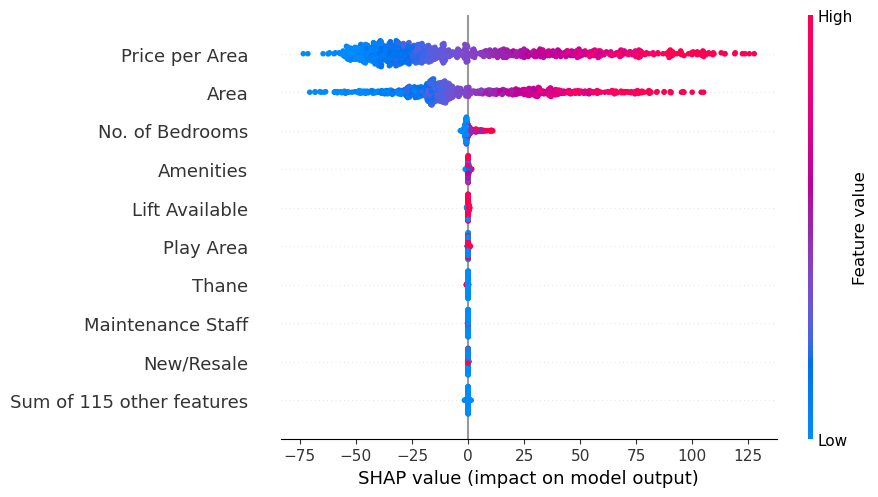

In [100]:
shap.plots.beeswarm(shap_values)
fig.savefig('shap_beeswarmcatboost.png',dpi = 200)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 6346
Columns: 127 entries, Price to Yogi hills
dtypes: float64(2), int64(17), object(2), uint8(106)
memory usage: 1.1+ MB


In [102]:
def predict_price(location,area,ppa,bhk,status,gym,lift,carpark,maintenance,security,childplayarea
                  ,intercom,clubhouse,landscape,games,gas,joggingtrack,pool,amenities):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = ppa
    x[2] = bhk
    x[3] = status
    x[4] = gym
    x[5] = lift
    x[6] = carpark
    x[7] = maintenance
    x[8] = security
    x[9] = childplayarea
    x[10] = intercom
    x[11] = clubhouse
    x[12] = landscape
    x[13] = games
    x[14] = gas
    x[15] = joggingtrack
    x[16] = pool
    x[17] = amenities
    
    if loc_index >= 0:
        x[loc_index] = 1

    return catboost_model.predict([x])[0]


In [103]:
print('Price of a 720 sqft 2 BHK in Khar at the rate of Rs 2000 per sqft : ',predict_price('Khar',720,2000,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,5),'lakhs')

Price of a 720 sqft 2 BHK in Khar at the rate of Rs 2000 per sqft :  34.53518685580072 lakhs


## Creating a pickle file

In [104]:
#pip install pickle

In [105]:
import pickle

In [106]:
with open("hpp.pickle","wb") as f:
    pickle.dump(catboost_model,f)

## Importing column names to a json file

In [107]:
list=X.columns.values.tolist()

In [108]:
print('Columns in the final dataset which is fed to the models : ',list)

Columns in the final dataset which is fed to the models :  ['Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', 'Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool', 'Price per Area', 'Amenities', 'Ambarnath', 'Ambivali', 'Andheri East', 'Andheri West', 'Asangaon', 'Badlapur', 'Balkum', 'Bandra East', 'Bangur nagar', 'Belapur', 'Bhandup West', 'Bhayandar west', 'Bhayander', 'Bhiwandi', 'Boisar', 'Borivali East', 'Borivali West', 'Byculla', 'Chembur', 'Dahisar', 'Deonar', 'Dharavi', 'Dombivali', 'Dombivali West', 'Ghansoli', 'Ghatkopar', 'Ghatkopar East', 'Ghodbunder Road', 'Goregaon East', 'Goregaon West', 'Govandi', 'I c colony', 'It colony', 'Jogeshwari', 'Jogeshwari east', 'Juhu', 'Kalamboli', 'Kalwa', 'Kalyan', 'Kalyan East', 'Kamothe', 'Kandivali', 'Kandivali West', 'Kanjurmarg', 'Karjat', 'Kavesar', 'Khar', 'Kharghar', 'Kharodi', 'Khop

In [109]:
#pip install json

In [110]:
import json
columns ={'data_columns' : [col.lower() for col in X.columns]}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [111]:
#pip install flask

In [112]:
#Done